# Analyse Générale des données

## Initialisation des paramètres

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime as dt
import scipy.stats as st

#désactivation des verifs du SSL
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#adresse des datas :
dir_ewd = "https://www.ewd.fr/portfolio/Data/PF1/"

## Fonctions

### Analyse Generale

In [2]:
# Fonction d'analyse Generale
def analyseGeneraleDonnees(Data):
    print('------------------ Analyse Générale des Données ------------------')

    #récupération du nom du dataframe
    nomData = [name for name in globals() if globals()[name] is Data]
    print('\n -- nom du DataFrame analysé :',nomData)

    #on retire la colone vide en fin de ligne si elle existe
    print('\n -- Mise en forme du DataFrame :')
    for nomColonne in Data.columns:
        if "Unnamed" in nomColonne:
            print('suppression de la colonne vide :',nomColonne)
            Data.pop(nomColonne)

    #récupération de la structure du tableau
    print('\n -- Structure du DataFrame :')
    structure=Data.shape
    print('nombre de lignes :',structure[0])
    print('nombre de colonnes :',structure[1])

    #affiche le type de variables, le nombre de valeurs nulles et le %de valeurs nulles
    variables=pd.DataFrame(Data.dtypes)
    variables.reset_index(inplace=True)
    variables.rename(columns={'index': 'variable',0: 'type'}, inplace=True)
    print('\n -- type des variables et fiabilité :')

    #recherche des valeurs nulles
    nbNulle = Data.isnull().sum()
    variables_nulles = nbNulle.index
    nbNulles=pd.DataFrame(variables_nulles, columns=['variable'])
    nbNulles['nulles']=nbNulle.values
    nbNulles['%nulles']=round(nbNulles['nulles']*100/structure[0])
    nbNulles = nbNulles.astype({'%nulles': int})

    #display(nbNulles)
    variables[['nulles','%nulles']]=nbNulles[['nulles','%nulles']]
    variables.sort_values(by='nulles',ascending=True, inplace=True)
    display(variables)


### Analyse doublons

In [3]:
def analyseDoublons(Data,Cles):
    print('\n -- Recherche des doublons dans le DataFrame :')
    #doublons=Data[Cles].duplicated() == True
    #display(Data[Data[[Cles]].duplicated() == True])
    #doublons=Data.duplicated(subset=Cles)
    if Data.duplicated(subset=Cles).any() == True :
        print('présence de doublons :') 
        display(Data[Data[Cles].duplicated(subset=Cles) == True])

    else :
        print('pas de doublon')

In [4]:
    #Data.groupby(Data.columns.tolist(), as_index=False).size()
    #detection des outliers

# Import des données

### EdStatsCountry

In [5]:
#Import du fichier EdStatsCountry
EdStatsCountry = pd.read_csv(dir_ewd+"EdStatsCountry.csv")
analyseGeneraleDonnees(EdStatsCountry)
analyseDoublons(EdStatsCountry,'Country Code')



------------------ Analyse Générale des Données ------------------

 -- nom du DataFrame analysé : ['EdStatsCountry']

 -- Mise en forme du DataFrame :
suppression de la colonne vide : Unnamed: 31

 -- Structure du DataFrame :
nombre de lignes : 241
nombre de colonnes : 31

 -- type des variables et fiabilité :


,variable,type,nulles,%nulles
0,Country Code,object,0,0
1,Short Name,object,0,0
2,Table Name,object,0,0
3,Long Name,object,0,0
9,WB-2 code,object,1,0
4,2-alpha code,object,3,1
15,System of National Accounts,object,26,11
5,Currency Unit,object,26,11
7,Region,object,27,11
8,Income Group,object,27,11



 -- Recherche des doublons dans le DataFrame :
pas de doublon


In [6]:
#EdStatsCountry.head()

### EdStatsCountrySeries

In [7]:
#Import des datas
EdStatsCountrySeries = pd.read_csv(dir_ewd+"EdStatsCountry-Series.csv")
#print(EdStatsCountrySeries.head())
analyseGeneraleDonnees(EdStatsCountrySeries)
analyseDoublons(EdStatsCountrySeries,['CountryCode','SeriesCode'])

------------------ Analyse Générale des Données ------------------

 -- nom du DataFrame analysé : ['EdStatsCountrySeries']

 -- Mise en forme du DataFrame :
suppression de la colonne vide : Unnamed: 3

 -- Structure du DataFrame :
nombre de lignes : 613
nombre de colonnes : 3

 -- type des variables et fiabilité :


,variable,type,nulles,%nulles
0,CountryCode,object,0,0
1,SeriesCode,object,0,0
2,DESCRIPTION,object,0,0



 -- Recherche des doublons dans le DataFrame :
pas de doublon


### EdStatsFootNote

In [8]:
#Import du fichier EdStatsFootNote
EdStatsFootNote = pd.read_csv(dir_ewd+"EdStatsFootNote.csv")
analyseGeneraleDonnees(EdStatsFootNote)
analyseDoublons(EdStatsFootNote,['CountryCode','SeriesCode','Year'])

------------------ Analyse Générale des Données ------------------

 -- nom du DataFrame analysé : ['EdStatsFootNote']

 -- Mise en forme du DataFrame :
suppression de la colonne vide : Unnamed: 4

 -- Structure du DataFrame :
nombre de lignes : 643638
nombre de colonnes : 4

 -- type des variables et fiabilité :


,variable,type,nulles,%nulles
0,CountryCode,object,0,0
1,SeriesCode,object,0,0
2,Year,object,0,0
3,DESCRIPTION,object,0,0



 -- Recherche des doublons dans le DataFrame :
pas de doublon


### EdStatsData

In [9]:
#Import du fichier EdStatsData
EdStatsData = pd.read_csv(dir_ewd+"EdStatsData.csv")
analyseGeneraleDonnees(EdStatsData)
analyseDoublons(EdStatsData,['Country Code','Indicator Code'])

------------------ Analyse Générale des Données ------------------

 -- nom du DataFrame analysé : ['EdStatsData']

 -- Mise en forme du DataFrame :
suppression de la colonne vide : Unnamed: 69

 -- Structure du DataFrame :
nombre de lignes : 886930
nombre de colonnes : 69

 -- type des variables et fiabilité :


,variable,type,nulles,%nulles
0,Country Name,object,0,0
1,Country Code,object,0,0
2,Indicator Name,object,0,0
3,Indicator Code,object,0,0
44,2010,float64,644488,73
...,...,...,...,...
6,1972,float64,851311,96
7,1973,float64,851385,96
5,1971,float64,851393,96
50,2016,float64,870470,98



 -- Recherche des doublons dans le DataFrame :
pas de doublon


### Test de la cohérence du nombre de SeriesCode pour la France entre CountrySeries et FootNote

EdStatsCountrySeries comporte 6 SeriesCode différents pour la France

In [10]:
EdStatsCountrySeries.loc[(EdStatsCountrySeries['CountryCode']=='FRA')].count()

CountryCode    6
SeriesCode     6
DESCRIPTION    6
dtype: int64

EdStatsFootNote comporte 211 SeriesCode différents pour la France

In [11]:
EdStatsFootNote.loc[(EdStatsFootNote['CountryCode']=='FRA')].drop_duplicates(subset='SeriesCode').count()

CountryCode    211
SeriesCode     211
Year           211
DESCRIPTION    211
dtype: int64

## Ajout du code Region dans les Datas (EdStatsData + EdStatsCountry --> DataIndicateurs)

In [12]:
# récuperation des regions en fonction des codes pays
RegionParPays=EdStatsCountry.loc[:,['Country Code','Region']]

In [13]:
# Ajout du code Region dans les indicateurs
DataIndicateurs=pd.merge(EdStatsData, RegionParPays, on='Country Code', how='left')
RegionColumn = DataIndicateurs.pop('Region')
DataIndicateurs.insert(2, 'Region', RegionColumn)


In [14]:
DataIndicateurs

,Country Name,Country Code,Region,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,NaN,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,Sub-Saharan Africa,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,Sub-Saharan Africa,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,Sub-Saharan Africa,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,Sub-Saharan Africa,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Filtrage des Indicateurs

In [15]:
# sauvegarde de l'indicateur avant alteration
DataIndicateursPass = DataIndicateurs.copy()
DataIndicateursPrev = DataIndicateurs.copy()

## filtre sur les années passées (DataIndicateursPass --> DataAnalyse1)

In [16]:
# diminution du nombre de colonnes (2000 -> 2020)
# regroupement des indicateurs pour compter le nombres de pays pour chacun (3665 indicateurs restants)
colonnes=DataIndicateursPass.columns
for annee in range(1970, 2101):
    if ((annee < 2000) | (annee > 2020)):
        if str(annee) in colonnes:
            DataIndicateursPass.drop(columns=str(annee), inplace=True)
DataAnalyse1=DataIndicateursPass.groupby(['Indicator Code','Indicator Name']).agg('count')

# filtre des colonnes des pays
if 'Region' in colonnes:
    DataAnalyse1.drop(columns='Region', inplace=True) 
if 'Country Name' in colonnes:
    DataAnalyse1.drop(columns='Country Name', inplace=True) 
if 'Country Code' in colonnes:
    DataAnalyse1.drop(columns='Country Code', inplace=True)

#display(DataAnalyse1)


## filtre sur les années à venir pour analyse prévisionnelle (DataIndicateursPrev)

In [17]:
# selection du nombre de colonnes (2020 -> 2100) pour analyse prévisionnelle
colonnes=DataIndicateursPrev.columns
for annee in range(1970, 2101):
    if (annee < 2020):
        if str(annee) in colonnes:
            DataIndicateursPrev=DataIndicateursPrev.drop(columns=str(annee))

display(DataIndicateursPrev)


,Country Name,Country Code,Region,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,NaN,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,NaN,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,Sub-Saharan Africa,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,Sub-Saharan Africa,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,Sub-Saharan Africa,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,Sub-Saharan Africa,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## filtre sur la fiabilité

### retournement du tableau (DataAnalyse1 --> DataAnalyse2)

In [18]:
#retournement du tableau pour travailler sur les colonnes
DataAnalyse2=DataAnalyse1.transpose()
display(DataAnalyse2)


Indicator Code,BAR.NOED.1519.FE.ZS,BAR.NOED.1519.ZS,BAR.NOED.15UP.FE.ZS,BAR.NOED.15UP.ZS,BAR.NOED.2024.FE.ZS,BAR.NOED.2024.ZS,BAR.NOED.2529.FE.ZS,BAR.NOED.2529.ZS,BAR.NOED.25UP.FE.ZS,BAR.NOED.25UP.ZS,...,UIS.XUNIT.US.4.FSGOV,UIS.XUNIT.US.56.FSGOV,UIS.XUNIT.USCONST.1.FSGOV,UIS.XUNIT.USCONST.2.FSGOV,UIS.XUNIT.USCONST.23.FSGOV,UIS.XUNIT.USCONST.3.FSGOV,UIS.XUNIT.USCONST.4.FSGOV,UIS.XUNIT.USCONST.56.FSGOV,XGDP.23.FSGOV.FDINSTADM.FFD,XGDP.56.FSGOV.FDINSTADM.FFD
Indicator Name,Barro-Lee: Percentage of female population age 15-19 with no education,Barro-Lee: Percentage of population age 15-19 with no education,Barro-Lee: Percentage of female population age 15+ with no education,Barro-Lee: Percentage of population age 15+ with no education,Barro-Lee: Percentage of female population age 20-24 with no education,Barro-Lee: Percentage of population age 20-24 with no education,Barro-Lee: Percentage of female population age 25-29 with no education,Barro-Lee: Percentage of population age 25-29 with no education,Barro-Lee: Percentage of female population age 25+ with no education,Barro-Lee: Percentage of population age 25+ with no education,...,Government expenditure per post-secondary non-tertiary student (US$),Government expenditure per tertiary student (US$),Government expenditure per primary student (constant US$),Government expenditure per lower secondary student (constant US$),Government expenditure per secondary student (constant US$),Government expenditure per upper secondary student (constant US$),Government expenditure per post-secondary non-tertiary student (constant US$),Government expenditure per tertiary student (constant US$),Government expenditure in secondary institutions education as % of GDP (%),Government expenditure in tertiary institutions as % of GDP (%)
2000,144,144,144,144,144,144,144,144,144,144,...,31,59,67,44,59,43,30,58,52,50
2001,0,0,0,0,0,0,0,0,0,0,...,34,67,69,49,61,46,33,65,57,61
2002,0,0,0,0,0,0,0,0,0,0,...,35,75,77,53,71,54,33,72,69,73
2003,0,0,0,0,0,0,0,0,0,0,...,29,62,69,47,64,48,28,60,62,60
2004,0,0,0,0,0,0,0,0,0,0,...,31,84,78,53,75,55,29,80,76,76
2005,144,144,144,144,144,144,144,144,144,144,...,31,74,81,53,73,52,31,72,80,75
2006,0,0,0,0,0,0,0,0,0,0,...,33,74,73,50,67,52,32,71,70,75
2007,0,0,0,0,0,0,0,0,0,0,...,36,72,78,58,74,57,35,70,79,81
2008,0,0,0,0,0,0,0,0,0,0,...,32,75,92,62,83,60,31,75,89,86


### filtre des indicateurs avec moins de 5 années de valeurs

In [19]:
# filtrage des indcateurs ayant moins de 5 années de valeurs  (1891 indicateurs restants)
nb_annees_min=5
colonnes=DataAnalyse2.columns
for indicator in DataAnalyse2.columns:
    nbValeurs=np.count_nonzero(np.array(DataAnalyse2[indicator]))
    #print(nbValeurs)
    if nbValeurs < nb_annees_min:
        #print(indicator[0],'-->',nbValeurs)
        if str(indicator[0]) in colonnes:
            DataAnalyse2.drop(columns=str(indicator[0]), inplace=True) 

display(DataAnalyse2)


Indicator Code,HH.DHS.GAR.456,HH.DHS.GAR.456.F,HH.DHS.GAR.456.M,HH.DHS.GAR.456.Q1,HH.DHS.GAR.456.Q2,HH.DHS.GAR.456.Q3,HH.DHS.GAR.456.Q4,HH.DHS.GAR.456.Q5,HH.DHS.GAR.456.R,HH.DHS.GAR.456.U,...,UIS.XUNIT.US.4.FSGOV,UIS.XUNIT.US.56.FSGOV,UIS.XUNIT.USCONST.1.FSGOV,UIS.XUNIT.USCONST.2.FSGOV,UIS.XUNIT.USCONST.23.FSGOV,UIS.XUNIT.USCONST.3.FSGOV,UIS.XUNIT.USCONST.4.FSGOV,UIS.XUNIT.USCONST.56.FSGOV,XGDP.23.FSGOV.FDINSTADM.FFD,XGDP.56.FSGOV.FDINSTADM.FFD
Indicator Name,DHS: Gross attendance rate. Post Secondary,DHS: Gross attendance rate. Post Secondary. Female,DHS: Gross attendance rate. Post Secondary. Male,DHS: Gross attendance rate. Post Secondary. Quintile 1,DHS: Gross attendance rate. Post Secondary. Quintile 2,DHS: Gross attendance rate. Post Secondary. Quintile 3,DHS: Gross attendance rate. Post Secondary. Quintile 4,DHS: Gross attendance rate. Post Secondary. Quintile 5,DHS: Gross attendance rate. Post Secondary. Rural,DHS: Gross attendance rate. Post Secondary. Urban,...,Government expenditure per post-secondary non-tertiary student (US$),Government expenditure per tertiary student (US$),Government expenditure per primary student (constant US$),Government expenditure per lower secondary student (constant US$),Government expenditure per secondary student (constant US$),Government expenditure per upper secondary student (constant US$),Government expenditure per post-secondary non-tertiary student (constant US$),Government expenditure per tertiary student (constant US$),Government expenditure in secondary institutions education as % of GDP (%),Government expenditure in tertiary institutions as % of GDP (%)
2000,12,12,12,12,12,12,12,12,12,12,...,31,59,67,44,59,43,30,58,52,50
2001,5,5,5,5,5,5,5,5,5,5,...,34,67,69,49,61,46,33,65,57,61
2002,3,3,3,3,3,3,3,3,3,3,...,35,75,77,53,71,54,33,72,69,73
2003,11,11,11,11,11,11,11,11,11,11,...,29,62,69,47,64,48,28,60,62,60
2004,7,7,7,7,7,7,7,7,7,7,...,31,84,78,53,75,55,29,80,76,76
2005,16,16,16,16,16,16,16,16,16,16,...,31,74,81,53,73,52,31,72,80,75
2006,9,9,9,9,9,9,9,9,9,9,...,33,74,73,50,67,52,32,71,70,75
2007,9,9,9,9,9,9,9,9,9,9,...,36,72,78,58,74,57,35,70,79,81
2008,9,9,9,9,9,9,9,9,9,9,...,32,75,92,62,83,60,31,75,89,86


## Filtre sur leurs noms

### retournement du tableau (DataAnalyse2 --> DataAnalyse3)

In [20]:
#retournement du tableau 
DataAnalyse3=DataAnalyse2.transpose()
DataAnalyse3=DataAnalyse3.reset_index(names=['Indicator Code', 'Indicator Name']) # reset des index pour retourner dans la configuration d'origine
display(DataAnalyse3)


,Indicator Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
0,HH.DHS.GAR.456,DHS: Gross attendance rate. Post Secondary,12,5,3,11,7,16,9,9,...,5,11,7,14,7,8,5,0,0,0
1,HH.DHS.GAR.456.F,DHS: Gross attendance rate. Post Secondary. Fe...,12,5,3,11,7,16,9,9,...,5,11,7,14,7,8,5,0,0,0
2,HH.DHS.GAR.456.M,DHS: Gross attendance rate. Post Secondary. Male,12,5,3,11,7,16,9,9,...,5,11,7,14,7,8,5,0,0,0
3,HH.DHS.GAR.456.Q1,DHS: Gross attendance rate. Post Secondary. Qu...,12,5,3,11,7,16,9,9,...,5,11,7,14,7,8,5,0,0,0
4,HH.DHS.GAR.456.Q2,DHS: Gross attendance rate. Post Secondary. Qu...,12,5,3,11,7,16,9,9,...,5,11,7,14,7,8,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,UIS.XUNIT.USCONST.3.FSGOV,Government expenditure per upper secondary stu...,43,46,54,48,55,52,52,57,...,62,70,74,61,47,21,0,0,0,0
1887,UIS.XUNIT.USCONST.4.FSGOV,Government expenditure per post-secondary non-...,30,33,33,28,29,31,32,35,...,33,37,35,33,19,10,0,0,0,0
1888,UIS.XUNIT.USCONST.56.FSGOV,Government expenditure per tertiary student (c...,58,65,72,60,80,72,71,70,...,86,94,87,74,55,21,0,0,0,0
1889,XGDP.23.FSGOV.FDINSTADM.FFD,Government expenditure in secondary institutio...,52,57,69,62,76,80,70,79,...,92,102,100,81,74,39,1,0,0,0


### élimination par mots clés (DataAnalyse3 --> Indicateurs)

In [21]:
# filtre a appliquer sur les noms des indicateurs (568 indicateurs restants)
filtre_entree=['rimary','15-year-olds','eading','core','childhood','male','gender parity','Population, age ']  # a preciser dans prez

# creer le repertoire si il n'existe pas
import os
if not os.path.exists("filtre_indicateurs"):
    os.makedirs("filtre_indicateurs")
# chager les indicateurs dans un dataframe pour y travailler
Indicateurs=DataAnalyse3[['Indicator Name','Indicator Code']]
print('Nombre indicateurs origine',Indicateurs['Indicator Code'].count())

for filtre in filtre_entree:
    file_sav='filtre_indicateurs/filtre_'+filtre+'.csv'
    filtre_final=Indicateurs['Indicator Name'].str.contains(filtre)
    print('Terme recherché ---------------------------------------------------------------> '+filtre+'')
    # sauvegarde des indicateurs filtrés dans un fichier au cas ou ...
    print('Sauvegarde des indicateurs filtrés dans : '+file_sav)
    Indicateurs[(filtre_final)].to_csv(file_sav, index=False)
    # comptage avant purge
    print('Nombre d\'indicateurs filtrées :',Indicateurs[(filtre_final)]['Indicator Code'].count())
    # purger les indicateurs du dataframe
    Indicateurs=Indicateurs.drop(Indicateurs[(filtre_final)].index, errors='ignore')
    # comptage apres purge
    print('Nombre d\'indicateurs restants :',Indicateurs['Indicator Code'].count())
# sauvegarde des indicateurs restants
Indicateurs.to_csv('indicateurs_restants.csv', index=False)

Nombre indicateurs origine 1891
Terme recherché ---------------------------------------------------------------> rimary
Sauvegarde des indicateurs filtrés dans : filtre_indicateurs/filtre_rimary.csv
Nombre d'indicateurs filtrées : 623
Nombre d'indicateurs restants : 1268
Terme recherché ---------------------------------------------------------------> 15-year-olds
Sauvegarde des indicateurs filtrés dans : filtre_indicateurs/filtre_15-year-olds.csv
Nombre d'indicateurs filtrées : 57
Nombre d'indicateurs restants : 1211
Terme recherché ---------------------------------------------------------------> eading
Sauvegarde des indicateurs filtrés dans : filtre_indicateurs/filtre_eading.csv
Nombre d'indicateurs filtrées : 11
Nombre d'indicateurs restants : 1200
Terme recherché ---------------------------------------------------------------> core
Sauvegarde des indicateurs filtrés dans : filtre_indicateurs/filtre_core.csv
Nombre d'indicateurs filtrées : 14
Nombre d'indicateurs restants : 1186
Ter

# Sélection des indicateurs

Après un balayage des [568 indicateurs restants](indicateurs_restants.csv) il semble pertinent d'étudier les indicateurs suivants :
* PIB per capita, PPP (constant 2011 international $) (NY.GDP.PCAP.PP.KD)
* Personal computers (per 100 people) (IT.CMP.PCMP.P2)
* Internet users (per 100 people) (IT.NET.USER.P2)
* Population, ages 15-24, total (SP.POP.1524.TO.UN)
* Population growth (annual %) (SP.POP.GROW)
* Expenditure on secondary as % of government expenditure on education (%) (SE.XPD.SECO.ZS)
* Expenditure on tertiary as % of government expenditure on education (%) (SE.XPD.TERT.ZS)


In [22]:
# Création d'un dataframe avec les indicateurs retenus
ColsIndic=['Indicateur','Nom','Unité']
DataIndic=[['NY.GDP.PCAP.PP.KD','PIB par habitant','($ constants de 2011)'],
      ['IT.CMP.PCMP.P2','Ordinateurs personnels','(pour 100 personnes)'],
      ['IT.NET.USER.P2','Utilisateurs Internet','(pour 100 personnes)'],
      ['SP.POP.1524.TO.UN','Population âgée de 15 à 24 ans','(Total)'],
      ['SP.POP.GROW','Croissance démographique','(% annuel)'],
      ['SE.XPD.SECO.ZS','Dépenses du secondaire en % des dépenses publiques d\'éducation','(%)'],
      ['SE.XPD.TERT.ZS','Dépenses d\'enseignement supérieur en % des dépenses publiques d\'éducation','(%)']]
SelectionIndicateurs=pd.DataFrame(data=DataIndic,columns=ColsIndic)
SelectionIndicateurs

,Indicateur,Nom,Unité
0,NY.GDP.PCAP.PP.KD,PIB par habitant,($ constants de 2011)
1,IT.CMP.PCMP.P2,Ordinateurs personnels,(pour 100 personnes)
2,IT.NET.USER.P2,Utilisateurs Internet,(pour 100 personnes)
3,SP.POP.1524.TO.UN,Population âgée de 15 à 24 ans,(Total)
4,SP.POP.GROW,Croissance démographique,(% annuel)
5,SE.XPD.SECO.ZS,Dépenses du secondaire en % des dépenses publi...,(%)
6,SE.XPD.TERT.ZS,Dépenses d'enseignement supérieur en % des dép...,(%)


# Nombre d'occurences de pays par indicateurs

## Tableau des occurences des indicateurs

In [23]:
nbpays_indicateursEtude = DataIndicateursPass.groupby('Indicator Code').agg(['count'])
nbpays_indicateursEtude.drop(columns=['Country Name','Country Code','Indicator Name','Region'], inplace=True) 
nbpays_indicateursEtude=nbpays_indicateursEtude.transpose()
nbpays_indicateursEtude.reset_index(inplace=True)
nbpays_indicateursEtude.rename(columns={'level_0': 'Année'}, inplace=True)
nbpays_indicateursEtude.drop(columns=['level_1'], inplace=True) 
display(nbpays_indicateursEtude)


Indicator Code,Année,BAR.NOED.1519.FE.ZS,BAR.NOED.1519.ZS,BAR.NOED.15UP.FE.ZS,BAR.NOED.15UP.ZS,BAR.NOED.2024.FE.ZS,BAR.NOED.2024.ZS,BAR.NOED.2529.FE.ZS,BAR.NOED.2529.ZS,BAR.NOED.25UP.FE.ZS,...,UIS.XUNIT.US.4.FSGOV,UIS.XUNIT.US.56.FSGOV,UIS.XUNIT.USCONST.1.FSGOV,UIS.XUNIT.USCONST.2.FSGOV,UIS.XUNIT.USCONST.23.FSGOV,UIS.XUNIT.USCONST.3.FSGOV,UIS.XUNIT.USCONST.4.FSGOV,UIS.XUNIT.USCONST.56.FSGOV,XGDP.23.FSGOV.FDINSTADM.FFD,XGDP.56.FSGOV.FDINSTADM.FFD
0,2000,144,144,144,144,144,144,144,144,144,...,31,59,67,44,59,43,30,58,52,50
1,2001,0,0,0,0,0,0,0,0,0,...,34,67,69,49,61,46,33,65,57,61
2,2002,0,0,0,0,0,0,0,0,0,...,35,75,77,53,71,54,33,72,69,73
3,2003,0,0,0,0,0,0,0,0,0,...,29,62,69,47,64,48,28,60,62,60
4,2004,0,0,0,0,0,0,0,0,0,...,31,84,78,53,75,55,29,80,76,76
5,2005,144,144,144,144,144,144,144,144,144,...,31,74,81,53,73,52,31,72,80,75
6,2006,0,0,0,0,0,0,0,0,0,...,33,74,73,50,67,52,32,71,70,75
7,2007,0,0,0,0,0,0,0,0,0,...,36,72,78,58,74,57,35,70,79,81
8,2008,0,0,0,0,0,0,0,0,0,...,32,75,92,62,83,60,31,75,89,86
9,2009,0,0,0,0,0,0,0,0,0,...,33,87,89,65,80,62,33,86,92,91


## Graphiques des occurences des indicateurs

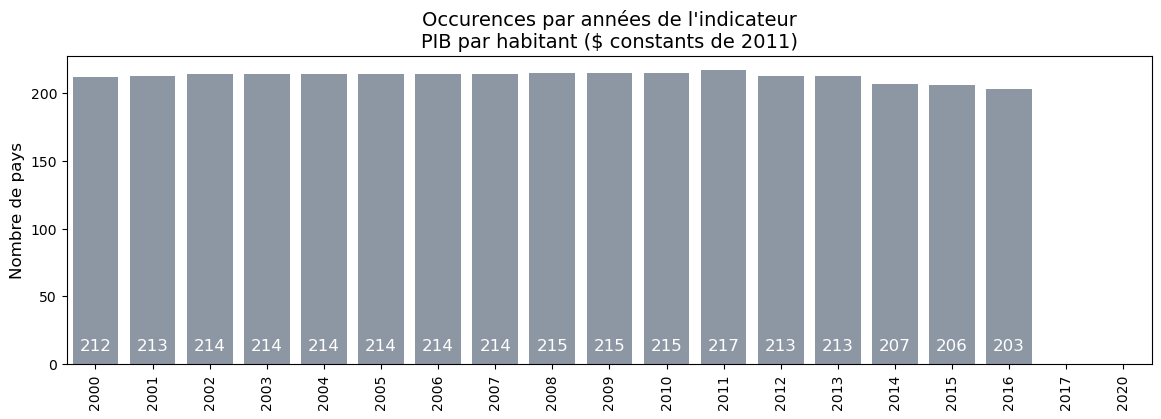

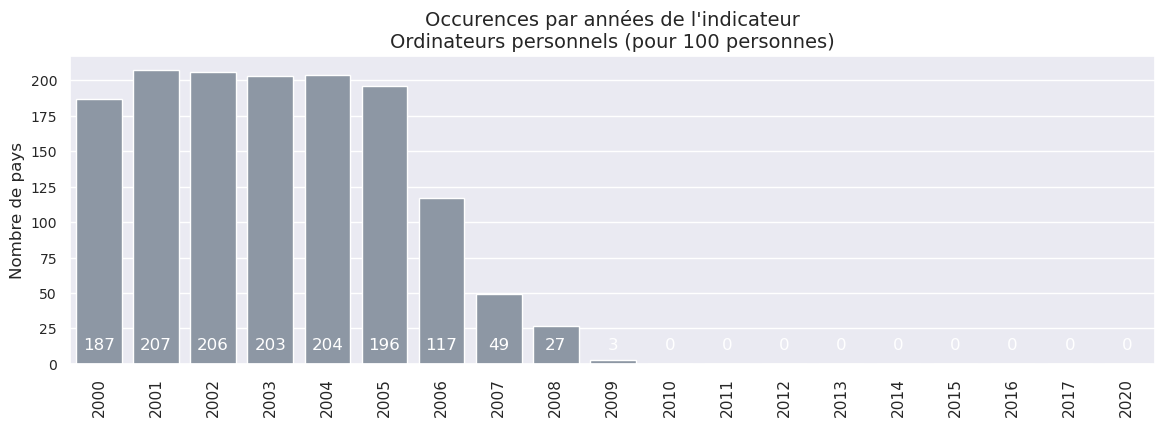

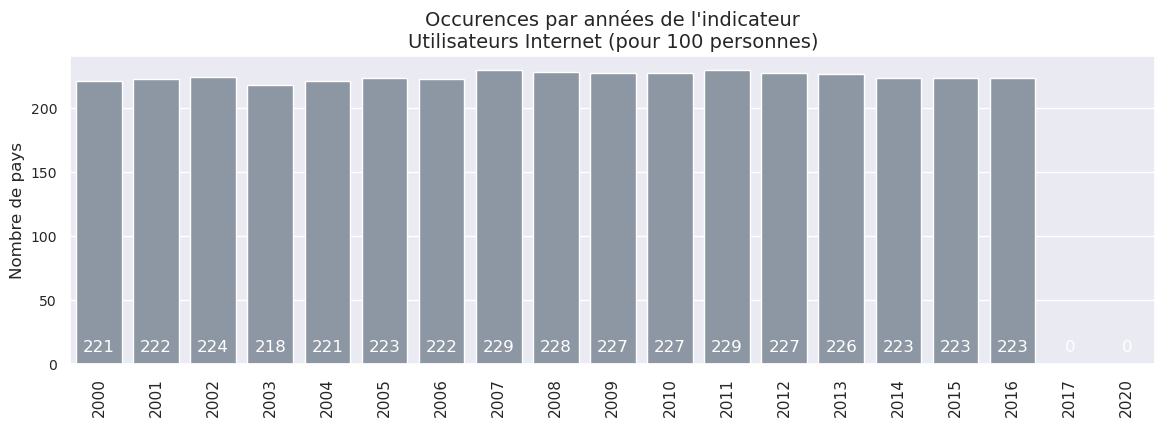

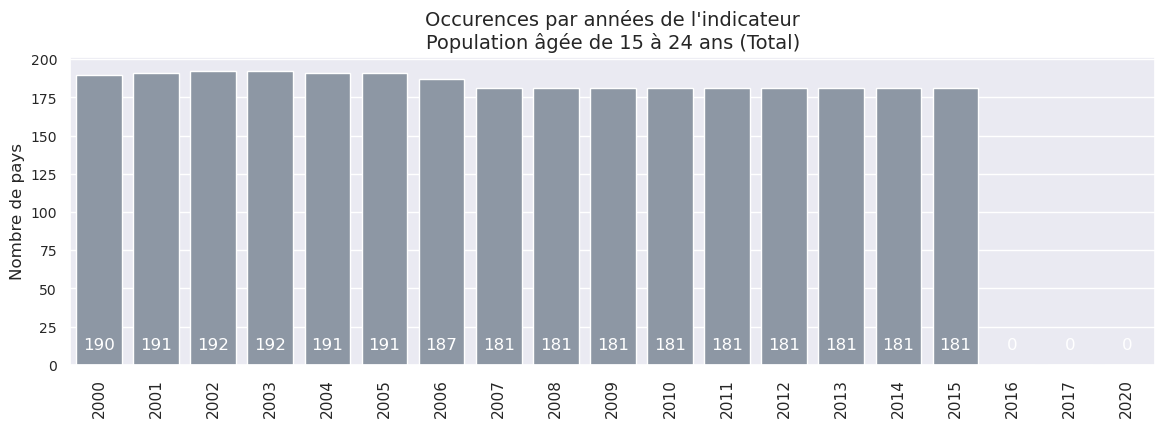

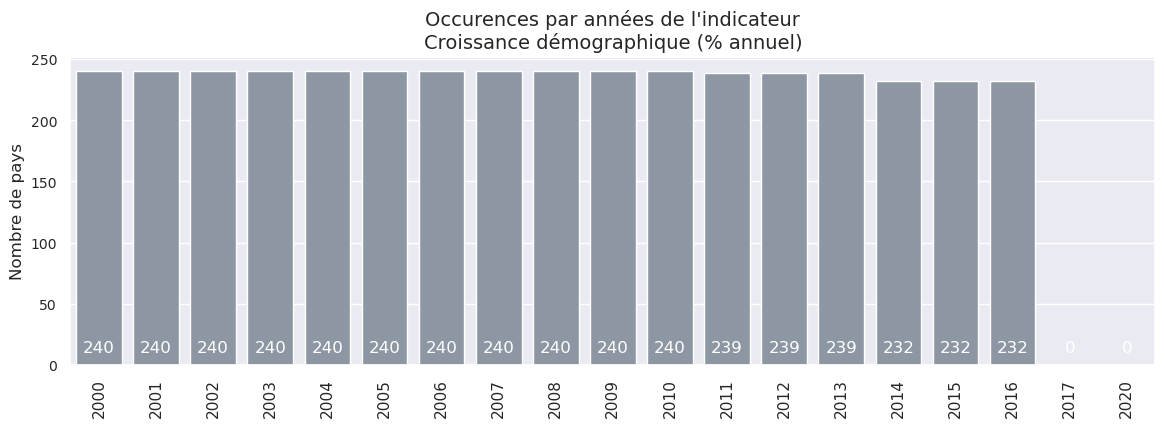

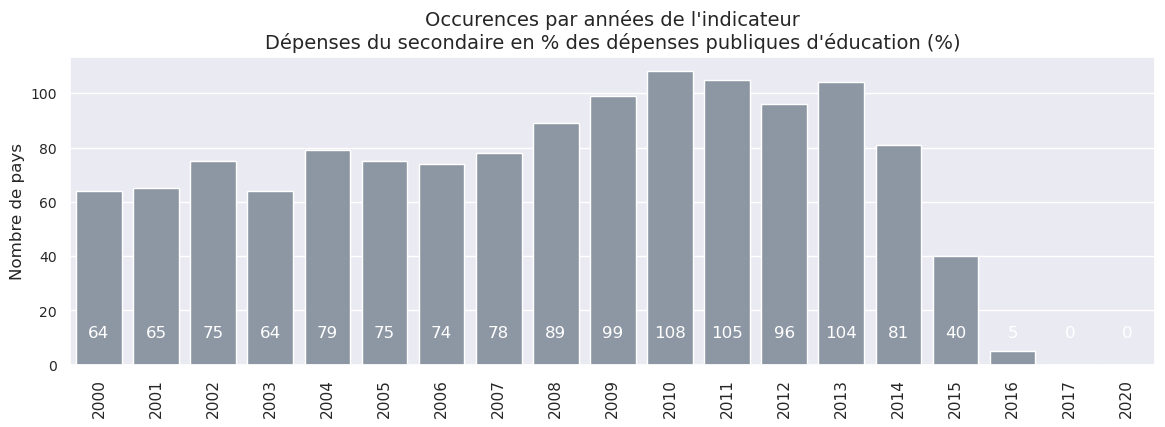

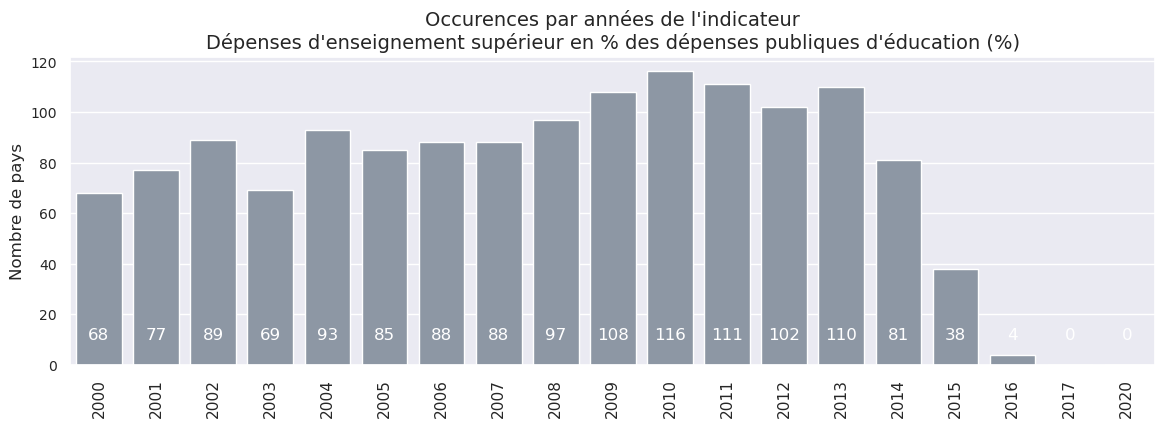

0    None
1    None
2    None
3    None
4    None
5    None
6    None
dtype: object

In [25]:
def GraphiqueParAn(Row):
    Data=nbpays_indicateursEtude
    Indic=Row['Indicateur']
    plt.figure(figsize=(14, 4))
    sns.barplot(data=Data, y=Indic, x='Année', color='#8996A8')
    sns.set_theme(style="darkgrid")
    for i in range(Data['Année'].count()):
        valeur=Data.loc[Data.index[i],Indic]
        plt.text(i,10,valeur,horizontalalignment='center',color='white')
    plt.ylabel('Nombre de pays', fontsize=12)
    plt.xlabel('')
    plt.yticks(fontsize=10)
    plt.xticks(rotation=90)
    plt.title("Occurences par années de l'indicateur\n"+Row['Nom']+' '+Row['Unité'], fontsize=14)
    plt.show()
SelectionIndicateurs.apply(GraphiqueParAn,axis='columns')


# PIB par habitant en fonction des régions pour 2016

Nous allons dans un premier temps étudier la richesse de chaque région en analysant le PIB moyen de celles-ci.

Pour cela nous étudierons l'indicateur PIB par habitant (exprimé en dollars internationaux constants de 2011) (NY.GDP.PCAP.PP.KD)

nous avons vu dans la rubrique "Nombre d'occurences de pays par indicateurs" que cet indicateur nous fournissait plus de 200 valeurs sur l'année 2016.

Nous retenons donc l'année 2016 pour notre étude.

## Analyse des statistiques de l'indicateur

In [52]:
# Visualisation du détail de l'indicateur PIB sur l'année 2016 par régions
PIBRegion2016=DataIndicateursPass.loc[DataIndicateursPass['Indicator Code']=="NY.GDP.PCAP.PP.KD"][['Region','2016']]
PIBRegionTab2016=PIBRegion2016.groupby(['Region'])['2016'].describe().astype(int)
PIBRegionTab2016=PIBRegionTab2016.reset_index()
PIBRegionTab2016=PIBRegionTab2016.sort_values(by='mean', ascending=False)
PIBRegionTab2016=PIBRegionTab2016.rename(columns={'count': 'nb pays','mean':'moyenne','50%':'médiane','std':'écart type'})
PIBRegionTab2016

,Region,nb pays,moyenne,écart type,min,25%,médiane,75%,max
4,North America,2,48214,7250,43087,45651,48214,50778,53341
3,Middle East & North Africa,15,31594,32140,2325,10535,16086,43100,118207
1,Europe & Central Asia,50,28767,18504,2762,15667,25852,39449,94764
0,East Asia & Pacific,30,20683,25650,1955,3767,7841,32656,96565
2,Latin America & Caribbean,31,13463,6633,1653,8084,13124,17660,30464
5,South Asia,8,6569,4564,1739,3063,5473,9044,14581
6,Sub-Saharan Africa,45,4933,6214,647,1491,2379,5301,26319


In [27]:
# recuperation et calcul de l'indicateur PIB par pays (moyenne entre 2014 et 2016)
Mask1=DataIndicateursPass['Indicator Code']=="NY.GDP.PCAP.PP.KD" # filtre pour indicateur du PIB / hab
Mask2=DataIndicateursPass['Region'].notna() # retire les entrées qui ne sont pas des pays
Mask=Mask1 & Mask2
PIBpaysMoy2014_2016=DataIndicateursPass.loc[Mask,['Country Name','Region','2014','2015','2016']]
PIBpaysMoy2014_2016['Moyenne']=PIBpaysMoy2014_2016.mean(axis=1,numeric_only=True)
PIBpaysMoy2014_2016.sort_values(by='Moyenne', ascending=False, inplace=True)
PIBpaysMoy2014_2016.head(40)

,Country Name,Region,2014,2015,2016,Moyenne
671941,Qatar,Middle East & North Africa,120860.067558,119749.428536,118207.134623,119605.543572
518011,"Macao SAR, China",East Asia & Pacific,130755.165775,100517.810672,96565.889805,109279.622084
514346,Luxembourg,Europe & Central Asia,93655.334163,94088.592225,94764.974767,94169.633718
715921,Singapore,East Asia & Pacific,80305.449884,80892.064838,81443.356456,80880.290393
195491,Brunei Darussalam,East Asia & Pacific,76089.286574,74600.164297,71788.783234,74159.411369
477696,Kuwait,Middle East & North Africa,70831.827760,68476.325041,68861.792098,69389.981633
840531,United Arab Emirates,Middle East & North Africa,64126.892082,65975.375547,67133.065519,65745.111049
627961,Norway,Europe & Central Asia,63419.314779,64028.419695,64179.038815,63875.591096
430051,Ireland,Europe & Central Asia,49327.390978,61144.732867,62991.909028,57821.344291
781891,Switzerland,Europe & Central Asia,57218.027926,57264.157397,57430.053265,57304.079530


## Graphiques de répartition PIB Mondial par habitant en fonction des régions (moyenne entre 2014 et 2016)

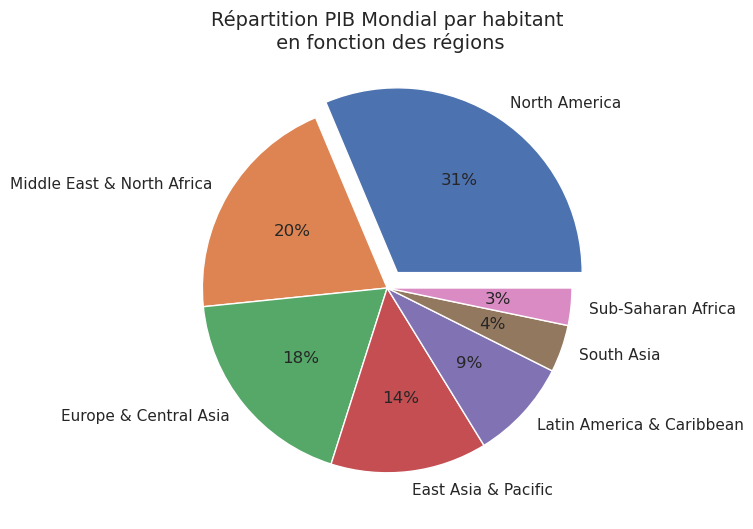

In [57]:
Data=PIBpaysMoy2014_2016.groupby(['Region'])['Moyenne'].mean().sort_values(ascending=False).reset_index()
sns.set_style("darkgrid")
plt.figure(figsize=(14,6))
#sns.set_theme(style="darkgrid")
explode = (0.1, 0, 0, 0, 0, 0, 0)
plt.pie(Data['Moyenne'], labels=Data['Region'], autopct='%1.0f%%', explode=explode)
plt.title("Répartition PIB Mondial par habitant\n en fonction des régions entre 2014 et 2016", fontsize=14)
plt.show()

## Graphique de comparaison des PIB par habitant en fonction des régions (moyenne entre 2014 et 2016)

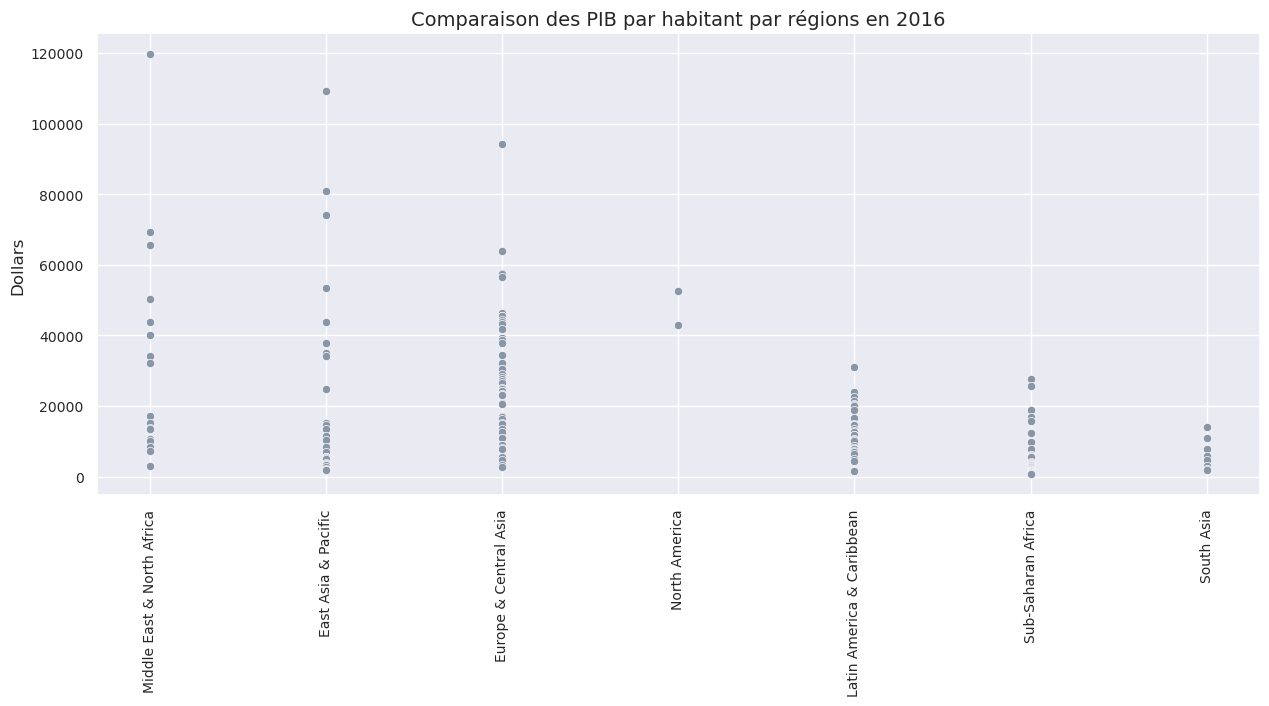

In [43]:
#order = PIBpaysMoy2014_2016.groupby(['Region'])['Moyenne'].median().sort_values(ascending=False).index
plt.figure(figsize=(15,6))
sns.set_theme(style="darkgrid")
#sns.set_style("whitegrid")
#sns.scatterplot(x = 'Region', y = 'Moyenne', data = PIBpaysMoy2014_2016, color='#8996A8', order=order)
sns.scatterplot(x = 'Region', y = 'Moyenne', data = PIBpaysMoy2014_2016, color='#8996A8')
plt.ylabel('Dollars', fontsize=12)
plt.xlabel('')
plt.yticks(fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.title("Comparaison des PIB par habitant par régions en 2016", fontsize=14)
plt.show()


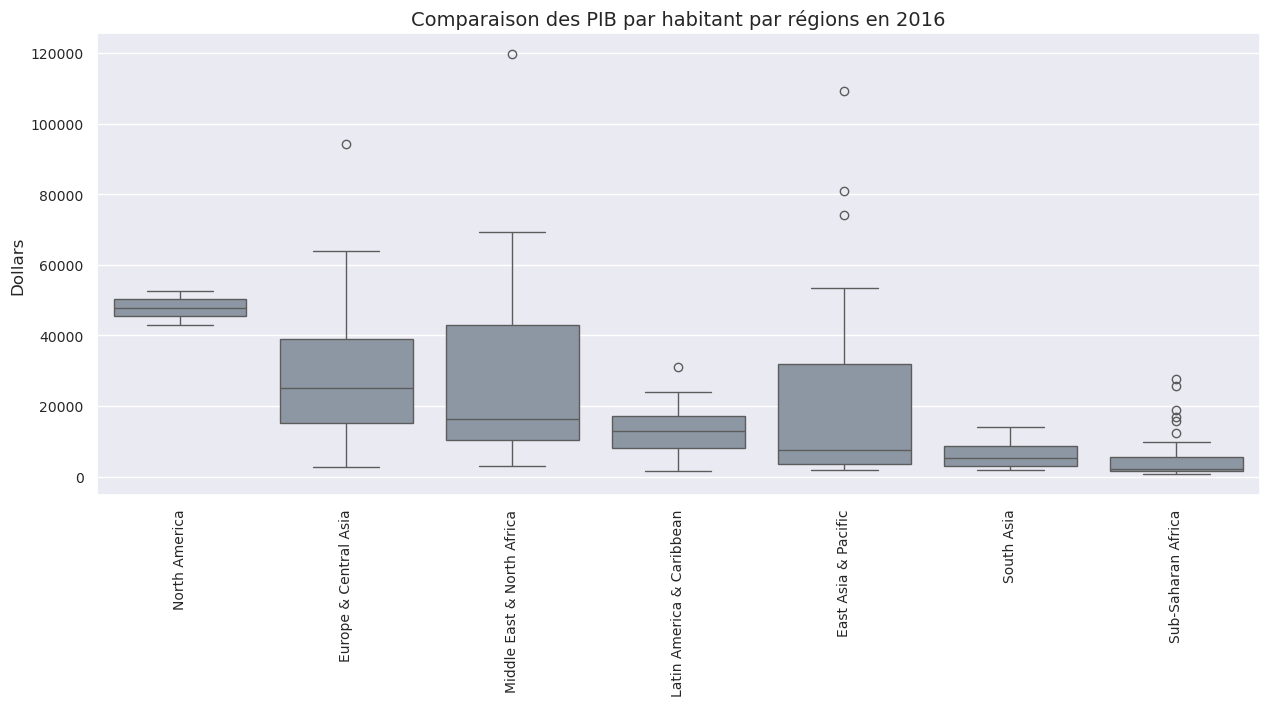

In [55]:
order = PIBpaysMoy2014_2016.groupby(['Region'])['Moyenne'].median().sort_values(ascending=False).index
plt.figure(figsize=(15,6))
sns.set_theme(style="darkgrid")
sns.boxplot(x = 'Region', y = 'Moyenne', data = PIBpaysMoy2014_2016, color='#8996A8', order=order)
plt.ylabel('Dollars', fontsize=12)
plt.xlabel('')
plt.yticks(fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.title("Comparaison des PIB par habitant par régions en 2016", fontsize=14)
plt.show()


# PIB par habitant en fonction des pays (moyenne entre 2014 et 2016)

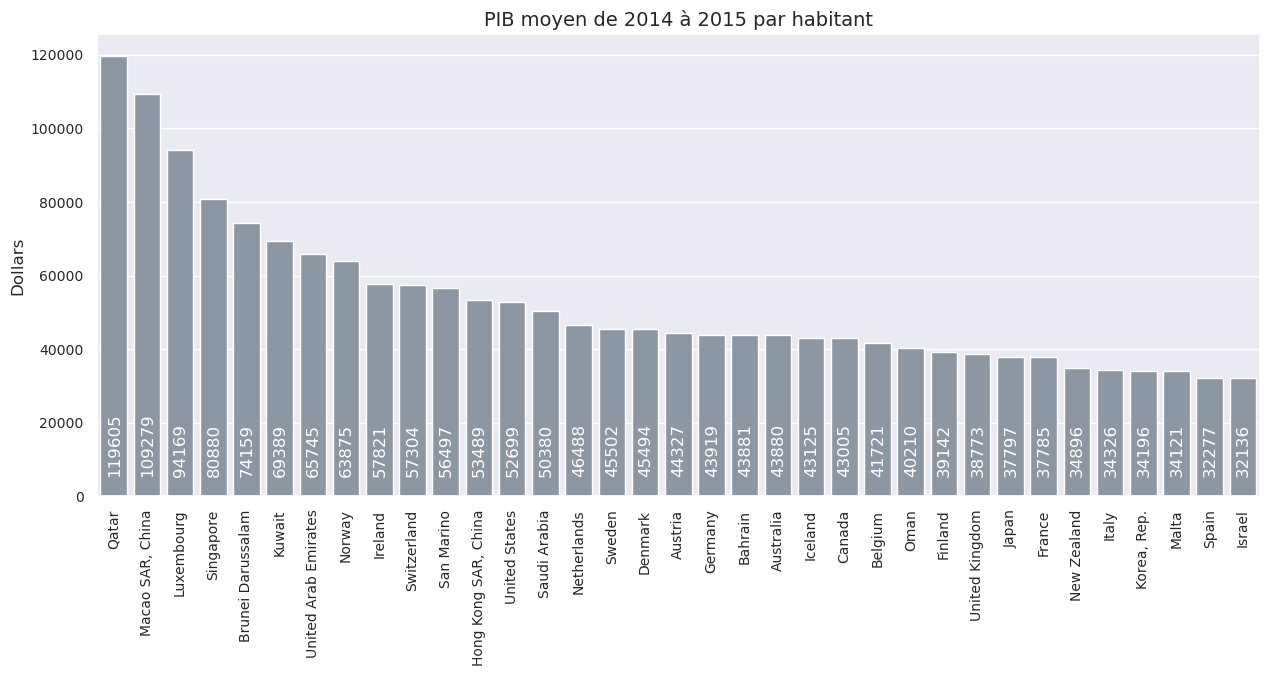

In [31]:
nombrepays=35 # nombre de pays souhaités pour l'analyse
marge=nombrepays/170 # calcul du decalage pour inscrire la valeur dans la barre
Data=PIBpaysMoy2014_2016.iloc[:nombrepays,:]
plt.figure(figsize=(15, 6))
sns.barplot(data=Data, y='Moyenne', x='Country Name', color='#8996A8', dodge=False)
sns.set_theme(style="darkgrid")
pibmoyen=Data['Moyenne'].tolist()
for i in range(nombrepays):
    plt.text(i-marge,6000,int(pibmoyen[i]), rotation=90, color='white')
plt.ylabel('Dollars', fontsize=12)
plt.xlabel('')
plt.yticks(fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.title("PIB moyen de 2014 à 2015 par habitant", fontsize=14)
plt.show()

# Selection de la liste de pays a annalyser
PaysAnalyseSelectByPIB=PIBpaysMoy2014_2016.iloc[:nombrepays,0]
#PaysAnalyse

# Graphiques d'étude

## Préparation des données pour l'étude graphique

In [32]:
#Transformation des indicateurs pour exploitation graphique
GraphIndicateursPass=DataIndicateursPass.copy()
GraphIndicateursPass=GraphIndicateursPass.drop(columns=['Country Code','Indicator Name']) 
GraphIndicateursPass=pd.pivot(GraphIndicateursPass, index='Indicator Code',columns=['Country Name','Region'])
GraphIndicateursPass=GraphIndicateursPass.transpose()
GraphIndicateursPass.reset_index(inplace=True)
GraphIndicateursPass.rename(columns={'level_0': 'Année'}, inplace=True)
#display(GraphIndicateurs)

## Fonction d'analyse graphique

In [33]:
nbPaysAnalyse=15  # nombre de pays souhaités pour l'analyse graphique
def GraphiqueDetailPays(Row,PaysListe):
    test=GraphIndicateursPass[['Année','Country Name',Row['Indicateur']]]
    test=pd.pivot(test, values=Row['Indicateur'], index='Année',columns='Country Name')
    test=test.reset_index(names='Année') 
    test=test.replace(0, np.nan)
    plt.figure(figsize=(14, 4))
    count=nbPaysAnalyse
    sns.set_theme(style="darkgrid")
    myMap = plt.get_cmap('tab20_r')
    for Pays in PaysListe:
        if ( count > 0 ):
            color=myMap(1/20*count)
            plt.plot(test['Année'], test[Pays], label=Pays, color=color)
            count -= 1
        else:
            break
    plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
    plt.ylabel(Row['Unité'], fontsize=12)
    plt.xlabel('')
    plt.yticks(fontsize=10)
    plt.xticks(rotation=90)
    #plt.xlim('2000', '2016')
    plt.axis(['2000', '2016',None, None])
    plt.title(Row['Nom'], fontsize=14)
    plt.show()

def GraphiqueDetailPaysSelectByPIB(Row):
    Pays=PaysAnalyseSelectByPIB
    GraphiqueDetailPays(Row,Pays)
def GraphiqueDetailPaysSelectByMe(Row):
    Pays=PaysAnalyseSelectByMe
    GraphiqueDetailPays(Row,Pays)

## Génération des graphiques d'étude

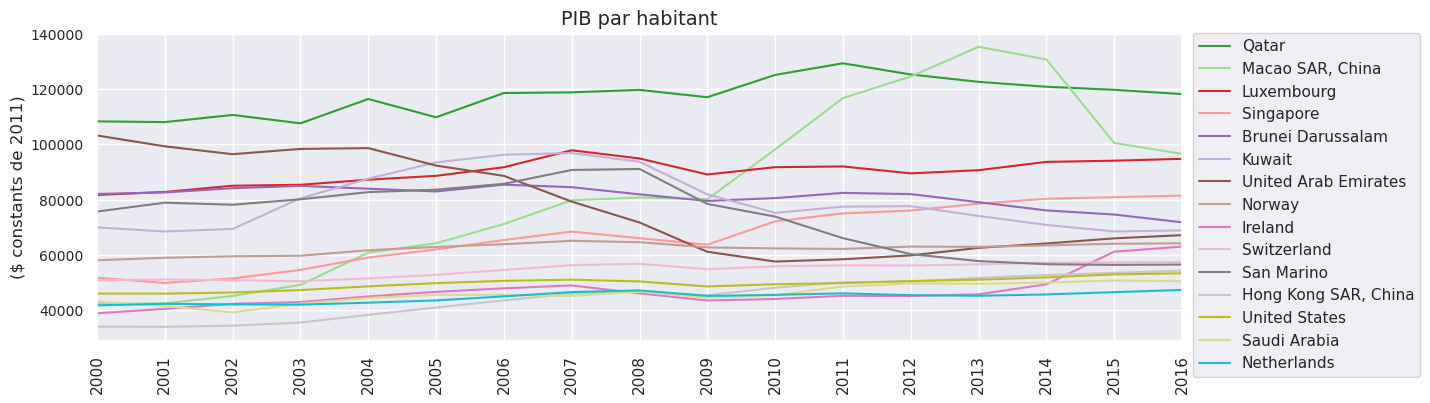

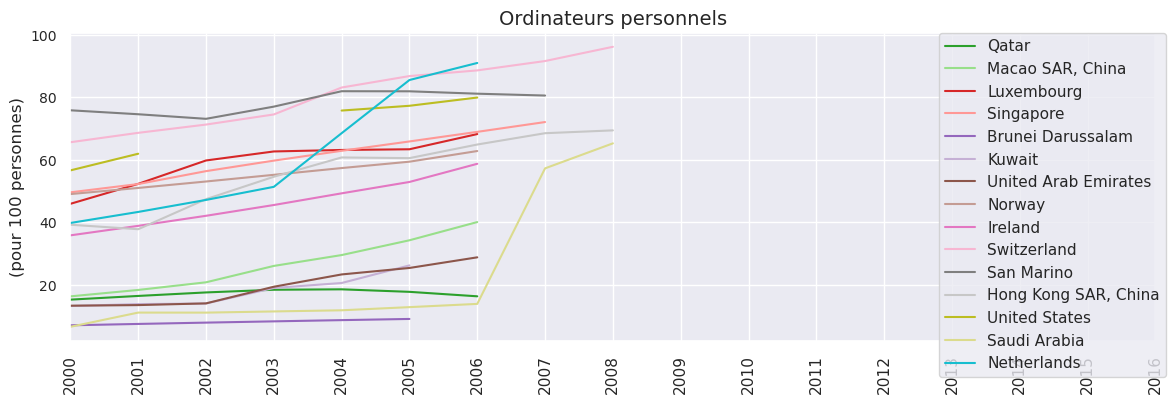

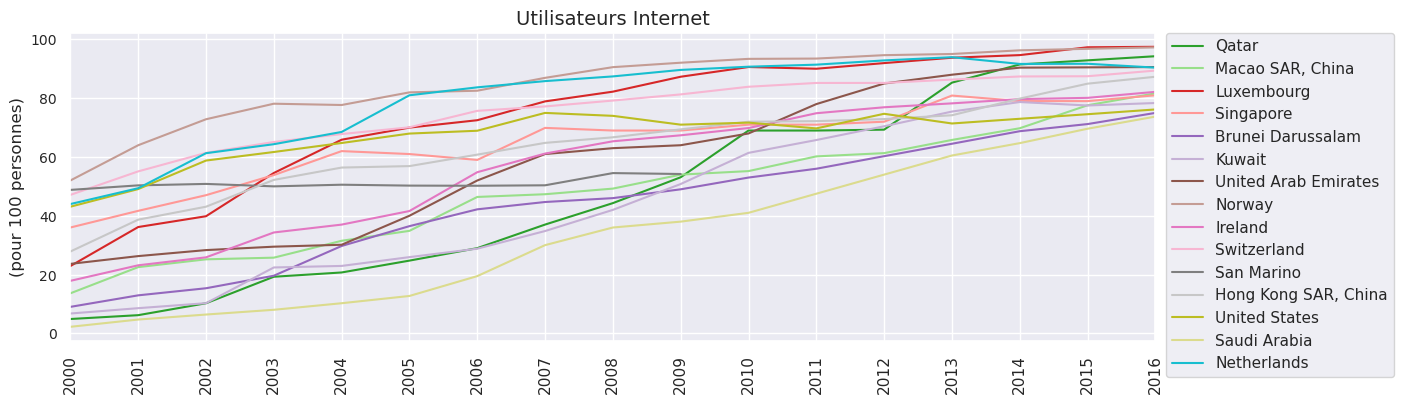

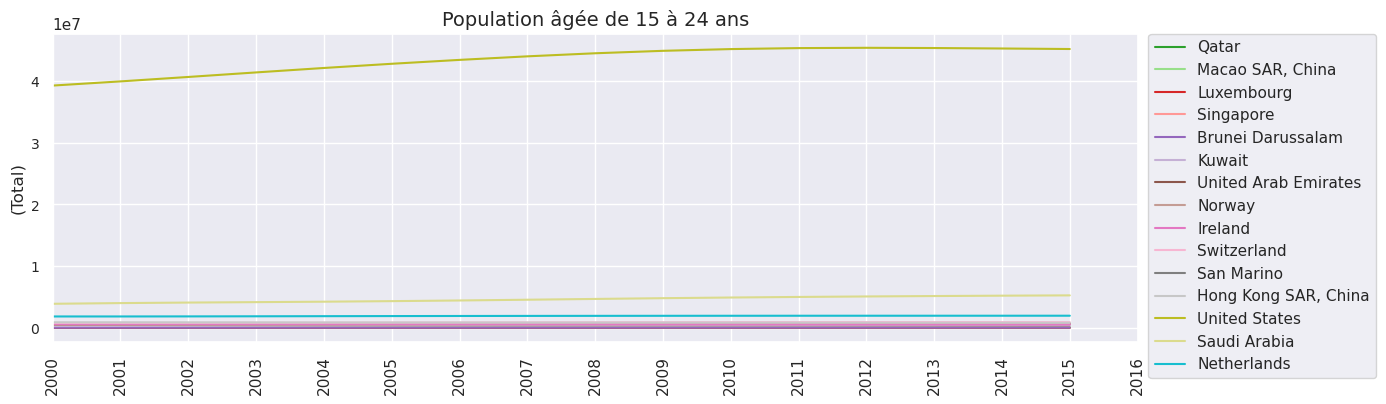

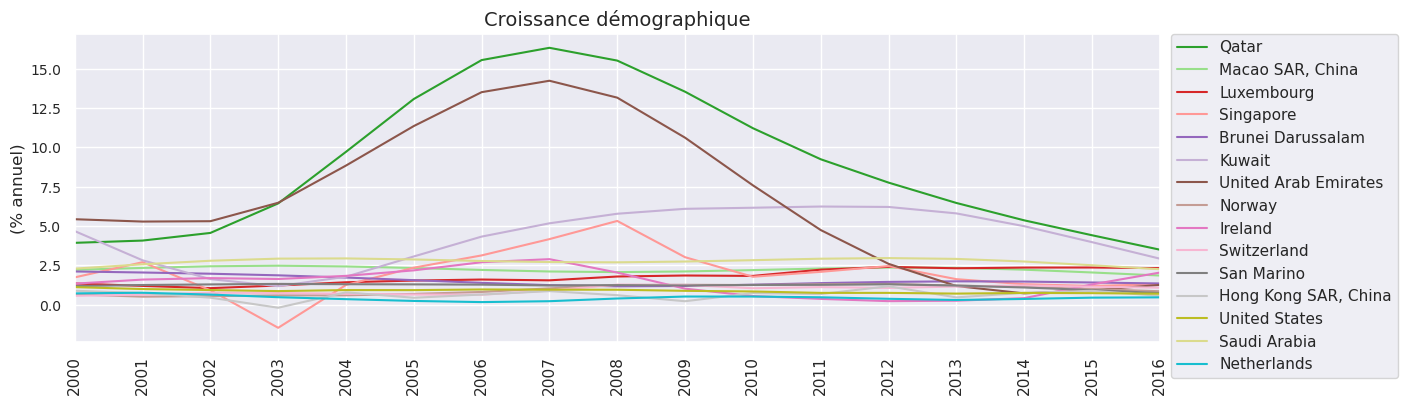

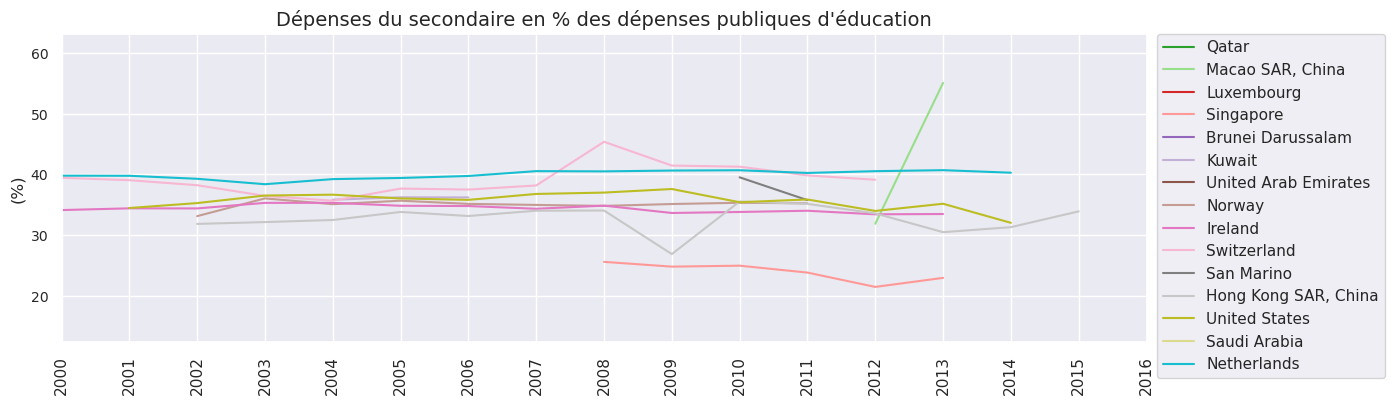

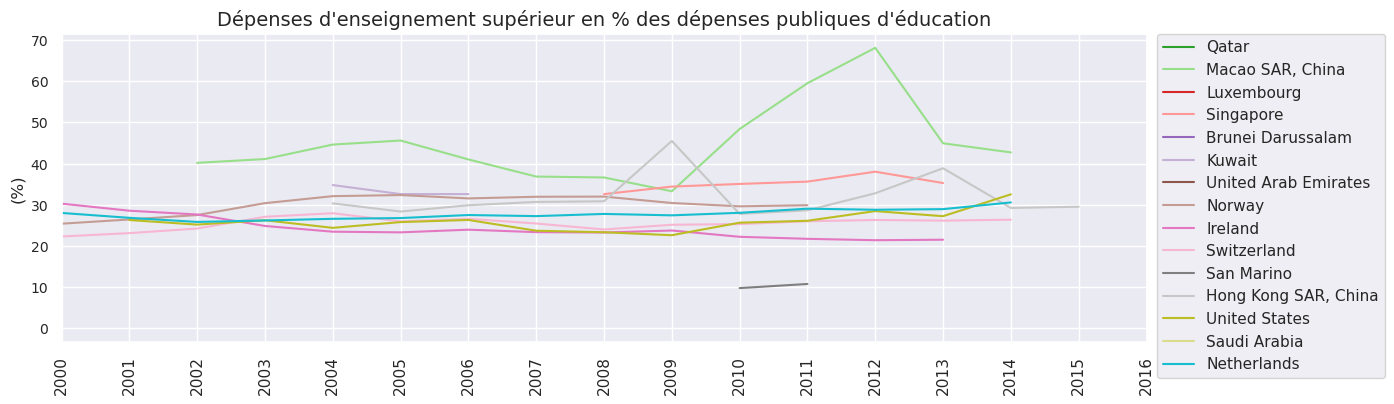

0    None
1    None
2    None
3    None
4    None
5    None
6    None
dtype: object

In [34]:
SelectionIndicateurs.apply(GraphiqueDetailPaysSelectByPIB,axis='columns')

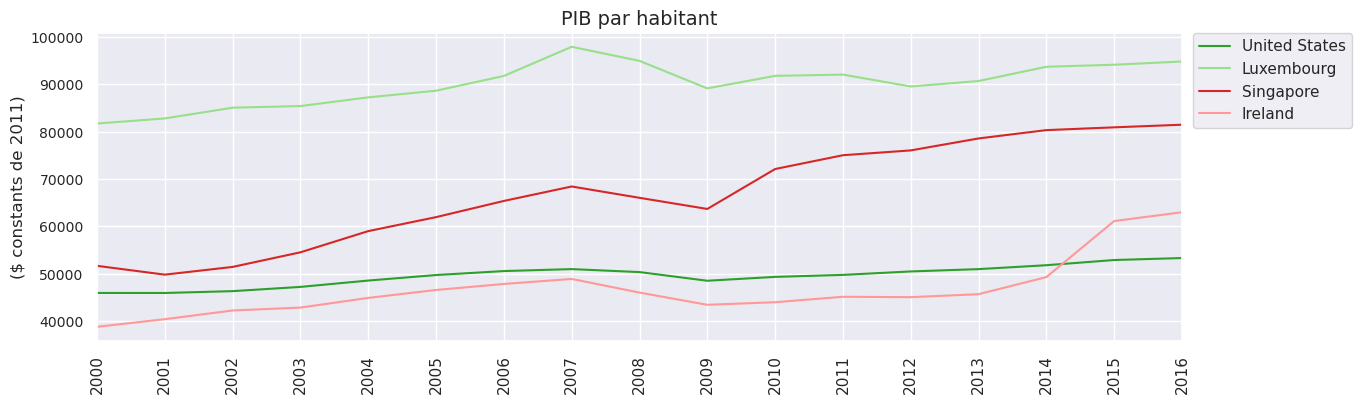

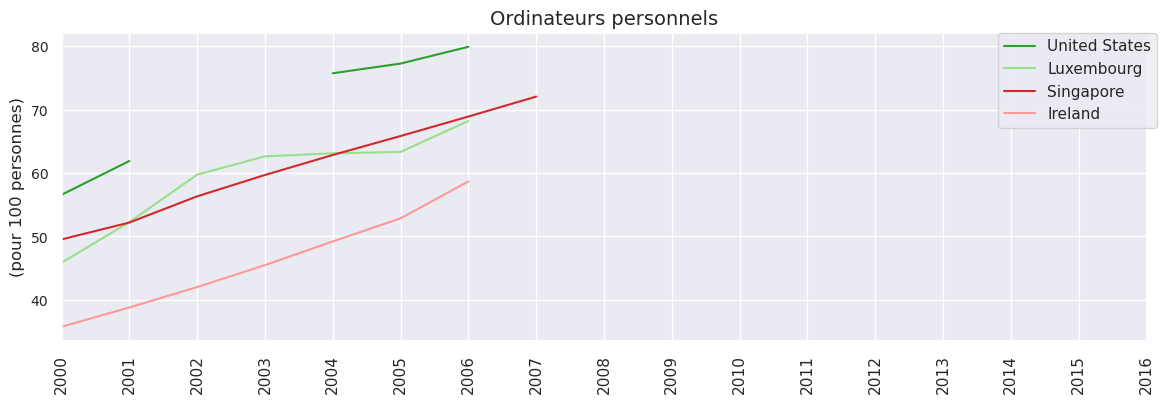

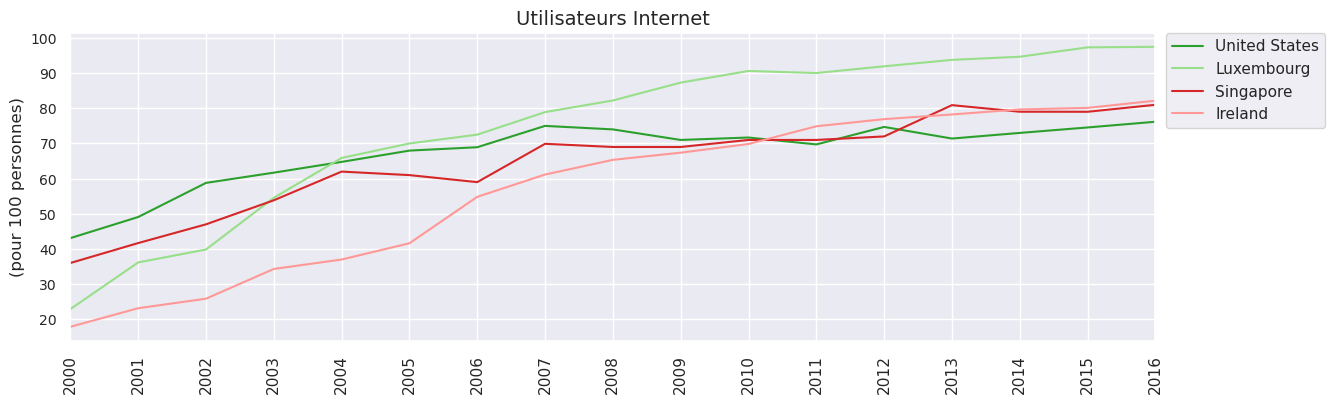

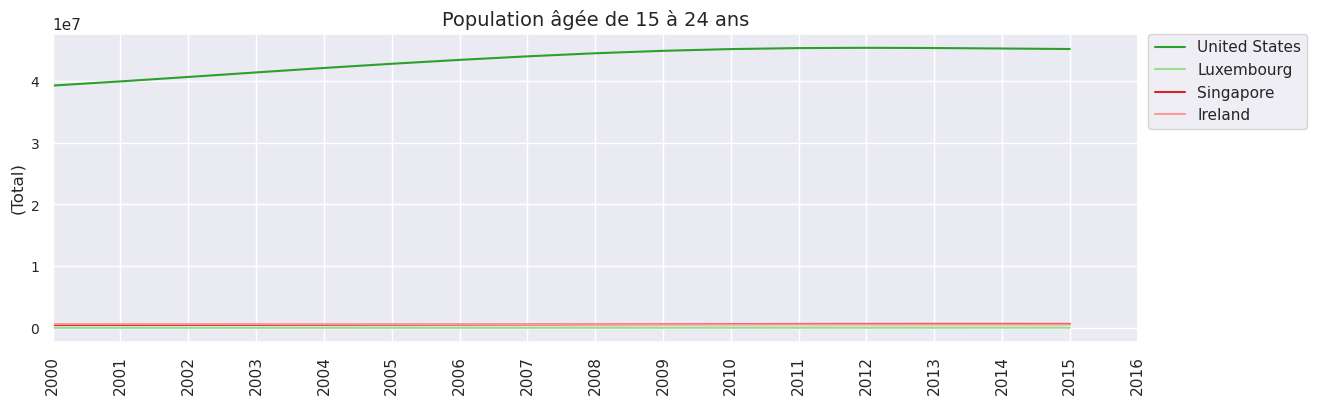

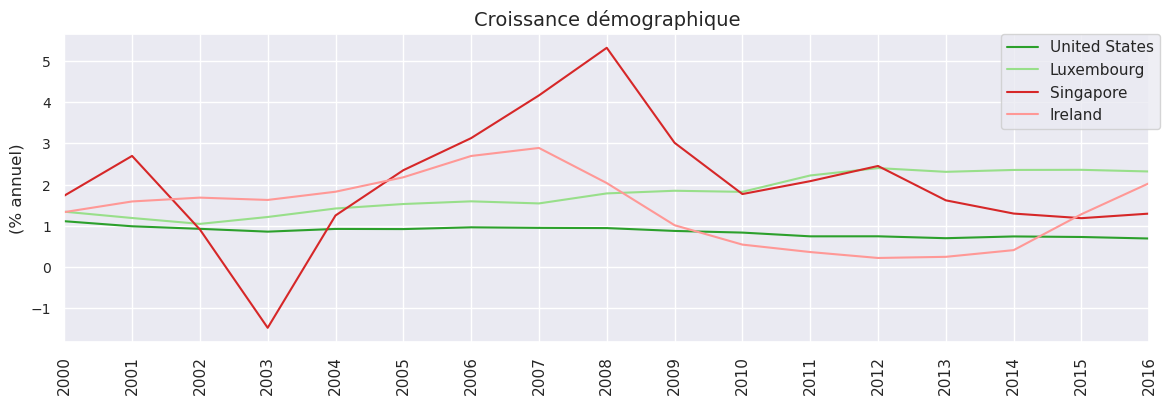

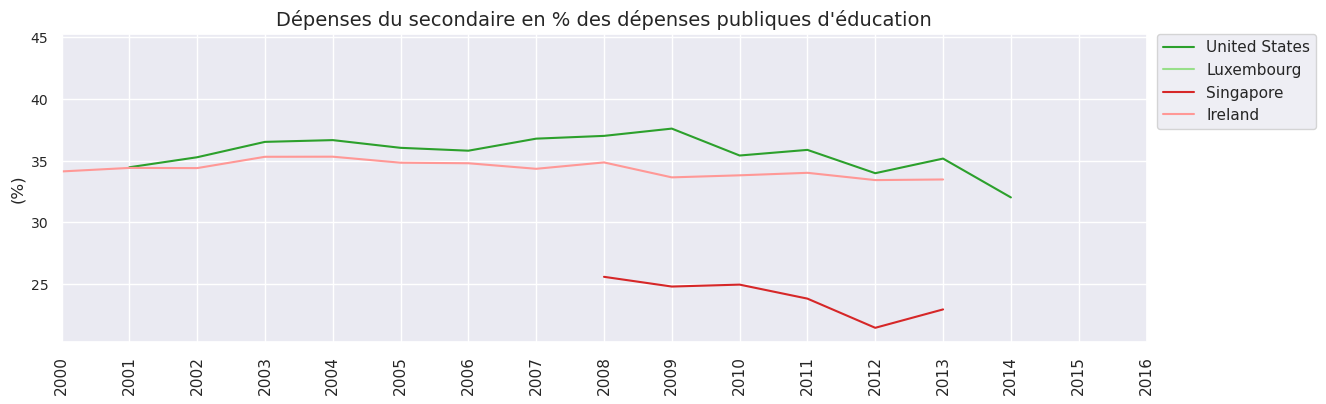

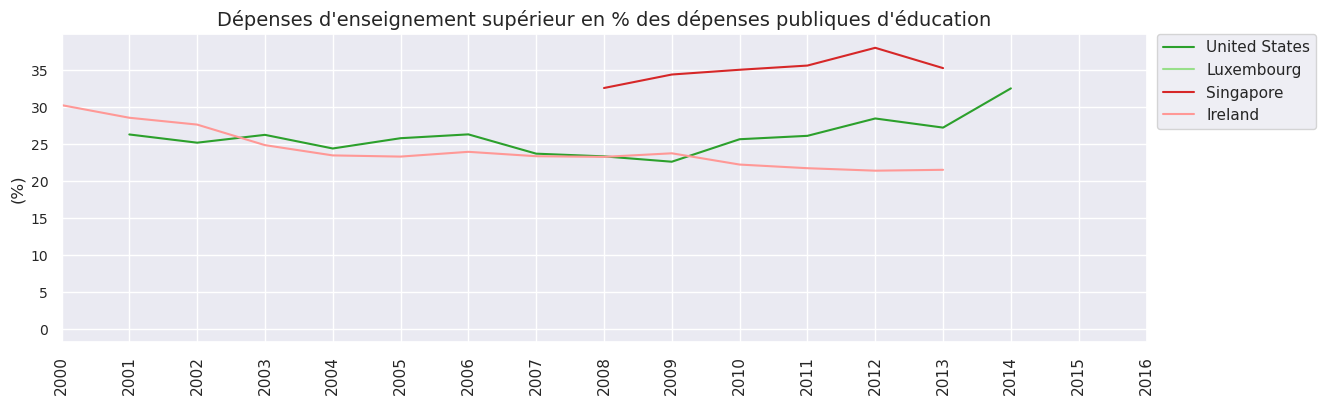

0    None
1    None
2    None
3    None
4    None
5    None
6    None
dtype: object

In [35]:
PaysAnalyseSelectByMe=pd.Series(['United States','Luxembourg','Singapore','Ireland'])
SelectionIndicateurs.apply(GraphiqueDetailPaysSelectByMe,axis='columns')

# Graphiques d'étude prévisionnelle

In [73]:
ColsIndicPrev=['Indicateur','Nom','Unité']
DataIndicPrev=[['PRJ.MYS.1519.MF','Projection des années moyennes de scolarité. 15-19 ans','(Années moyennes)'],
      ['PRJ.MYS.2024.MF','Projection des années moyennes de scolarité. 20-24 ans','(Années moyennes)'],
      ['PRJ.POP.2024.3.MF','Projection de la population âgée de 20 à 24 ans, ayant le niveau d\'éducation Secondaire','(en milliers)'],
      ['PRJ.POP.2024.4.MF','Projection de la population âgée de 20 à 24 ans, ayant le niveau d\'éducation Postsecondaire','(en milliers)'],
      ['PRJ.ATT.25UP.3.MF','Projection du pourcentage de la population âgée de 25 ans et plus ayant le niveau d\'éducation Secondaire','(% Population)'],
      ['PRJ.ATT.25UP.4.MF','Projection du pourcentage de la population âgée de 25 ans et plus ayant le niveau d\'éducation Postsecondaire','(% Population)'],
      ['PRJ.ATT.ALL.3.MF','Projection du pourcentage de la population totale ayant le niveau d\'éducation Secondaire','(% Population)'],
      ['PRJ.ATT.ALL.4.MF','Projection du pourcentage de la population totale ayant le niveau d\'éducation Postsecondaire','(% Population)']]
SelectionIndicateursPrev=pd.DataFrame(data=DataIndicPrev,columns=ColsIndicPrev)


## Préparation des données pour l'étude graphique prévisionnelle

In [74]:
#Transformation des indicateurs pour exploitation graphique
GraphIndicateursPrev=DataIndicateursPrev.copy()
GraphIndicateursPrev=GraphIndicateursPrev.drop(columns=['Country Code','Indicator Name']) 
GraphIndicateursPrev=pd.pivot(GraphIndicateursPrev, index='Indicator Code',columns=['Country Name','Region'])
GraphIndicateursPrev=GraphIndicateursPrev.transpose()
GraphIndicateursPrev.reset_index(inplace=True)
GraphIndicateursPrev.rename(columns={'level_0': 'Année'}, inplace=True)
#display(GraphIndicateursPrev)

## Fonction d'analyse graphique prévisionnelle

In [75]:
nbPaysAnalyse=15  # nombre de pays souhaités pour l'analyse graphique
def GraphiqueDetailPaysPrev(Row,PaysListe):
    test=GraphIndicateursPrev[['Année','Country Name',Row['Indicateur']]]
    test=pd.pivot(test, values=Row['Indicateur'], index='Année',columns='Country Name')
    test=test.reset_index(names='Année') 
    test=test.replace(0, np.nan)
    #display(test)
    myMap = plt.get_cmap('tab20_r')
    plt.figure(figsize=(14, 4))
    count=nbPaysAnalyse
    for Pays in PaysListe:
        if ( count > 0 ):
            color=myMap(1/20*count)
            plt.plot(test['Année'], test[Pays], label=Pays, color=color)
            count -= 1
        else:
            break
    plt.legend(bbox_to_anchor=(1, 1.02))
    plt.ylabel(Row['Unité'], fontsize=12)
    plt.xlabel('')
    plt.yticks(fontsize=10)
    plt.xticks(rotation=90)
    plt.title(Row['Nom'], fontsize=14)
    plt.show()

def GraphiqueDetailPaysSelectByPIBPrev(Row):
    Pays=PaysAnalyseSelectByPIB
    GraphiqueDetailPaysPrev(Row,Pays)
def GraphiqueDetailPaysSelectByMePrev(Row):
    Pays=PaysAnalyseSelectByMe
    GraphiqueDetailPaysPrev(Row,Pays)

## Génération des graphiques d'étude prévisionnelle

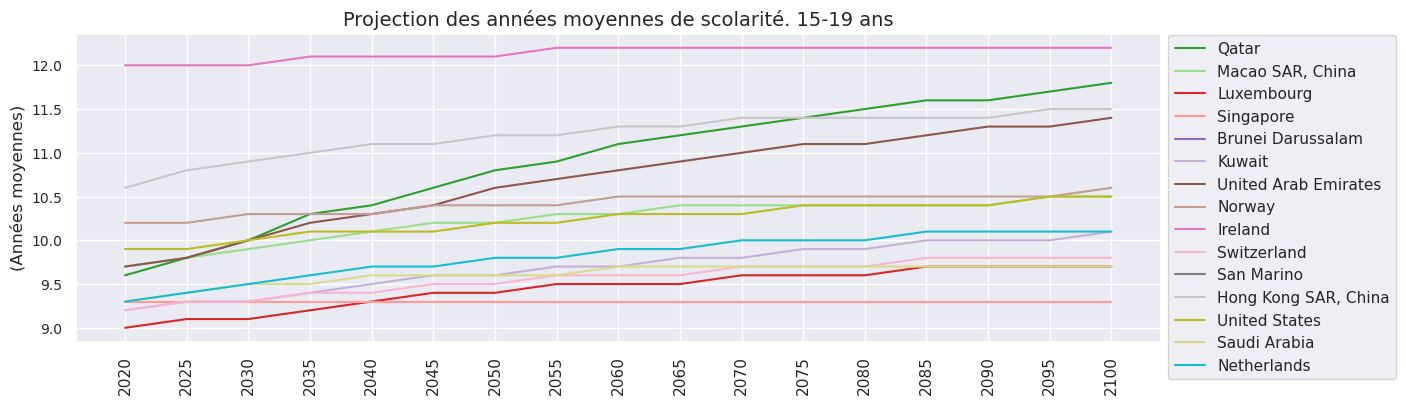

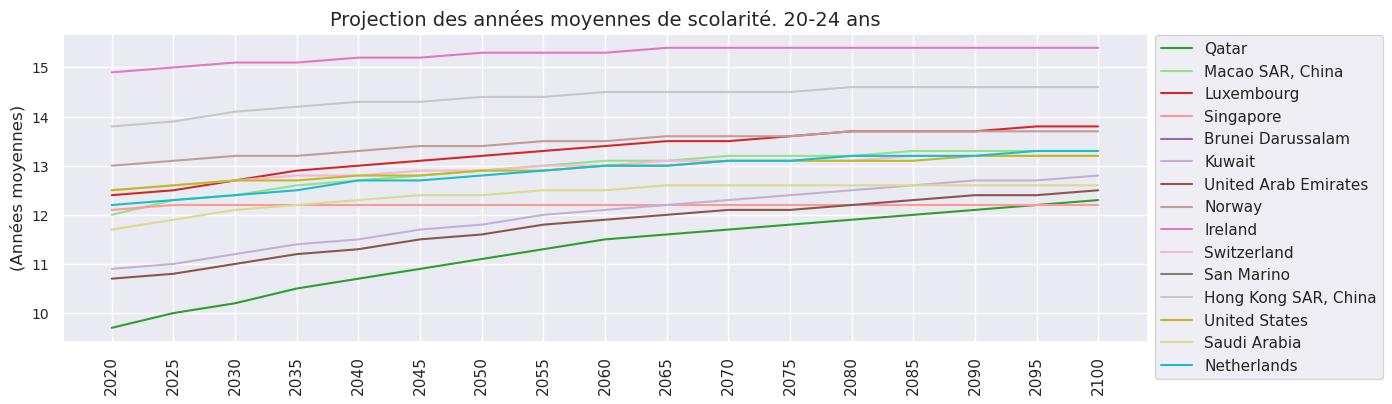

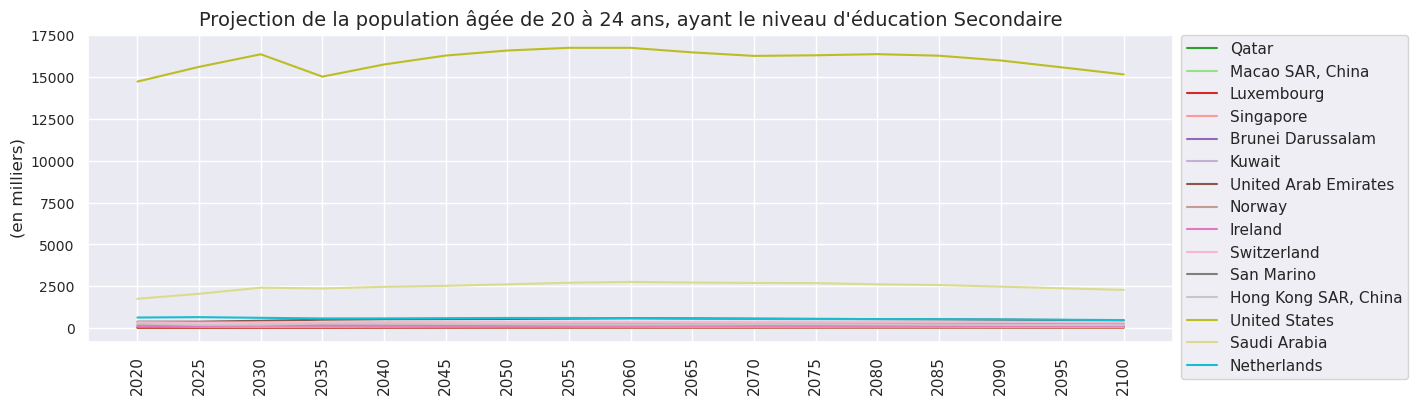

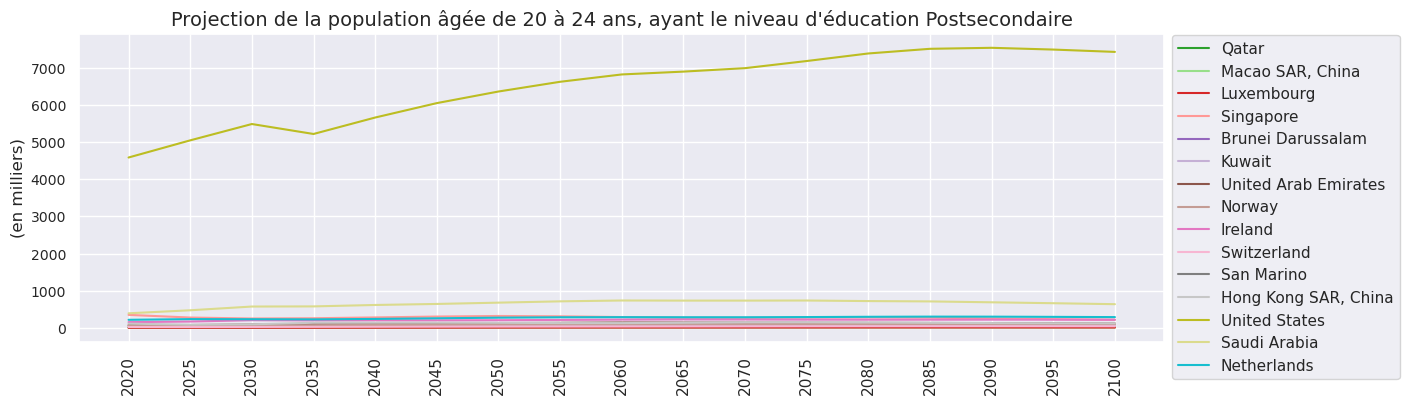

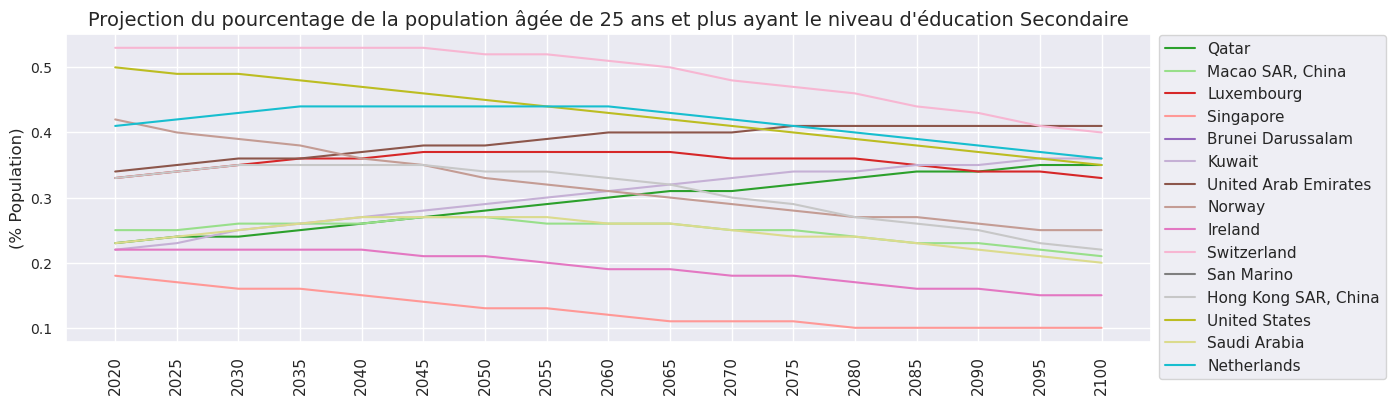

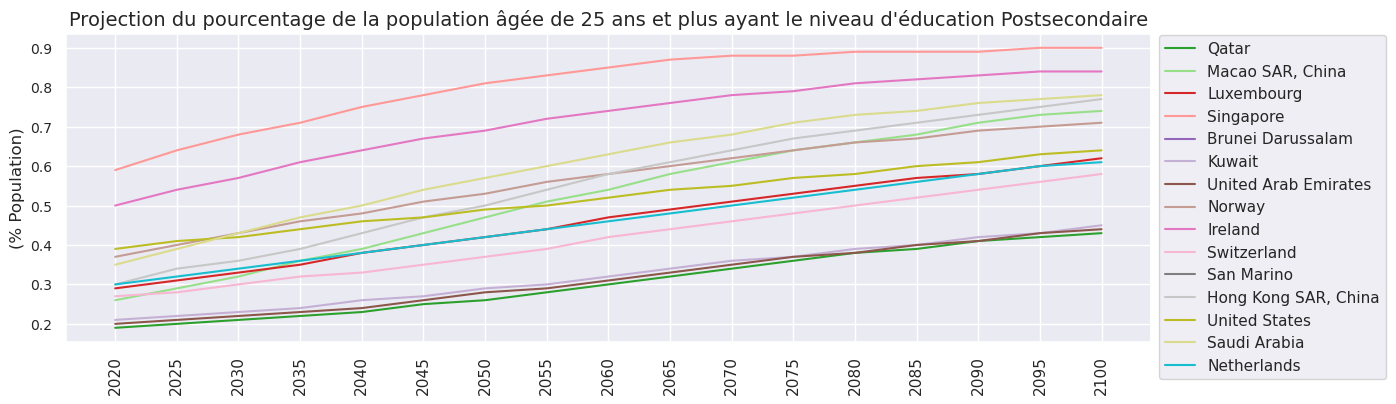

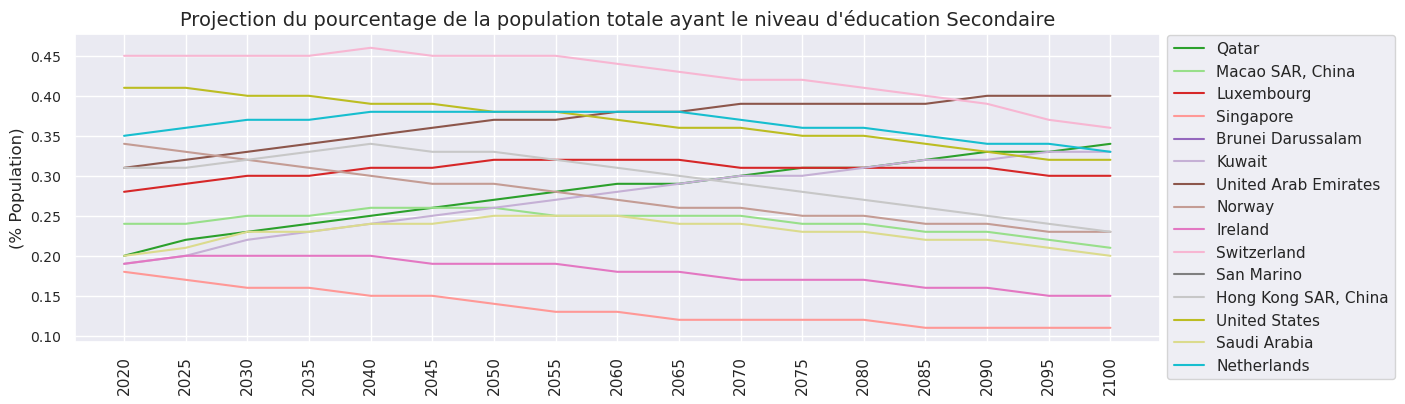

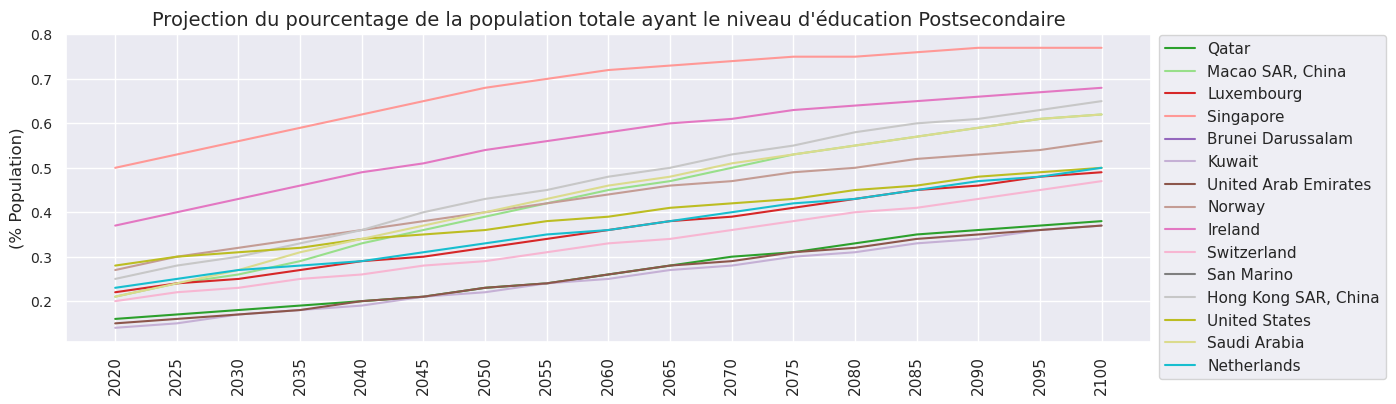

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
dtype: object

In [76]:
SelectionIndicateursPrev.apply(GraphiqueDetailPaysSelectByPIBPrev,axis='columns')

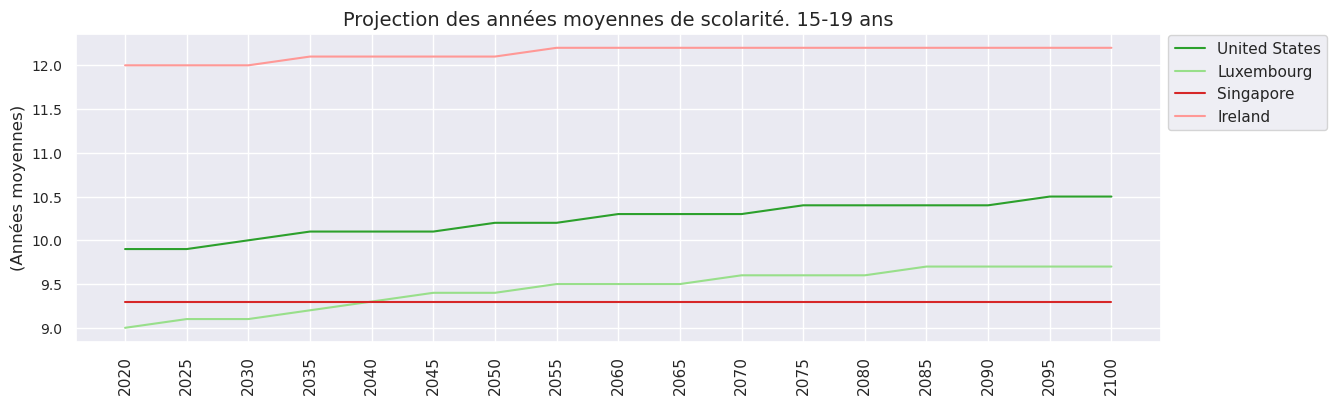

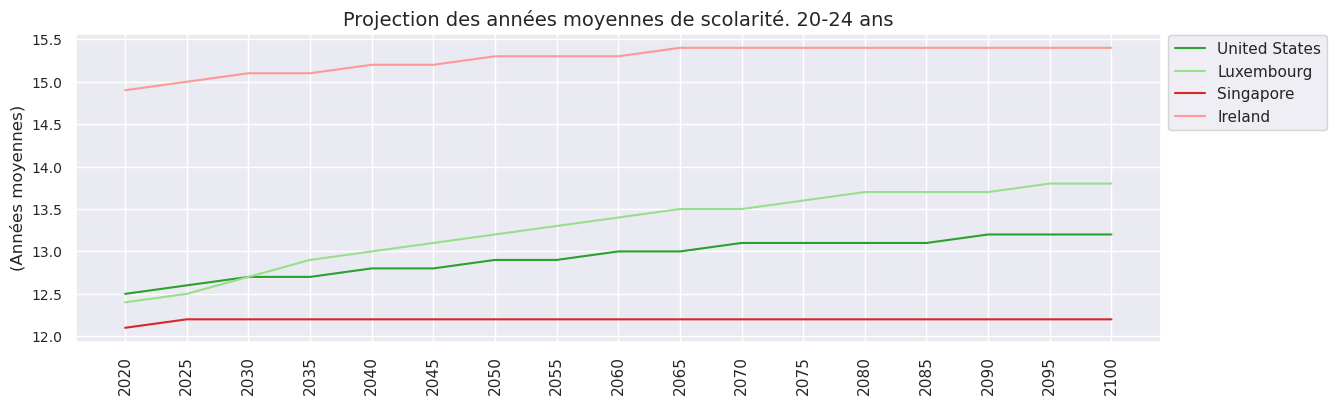

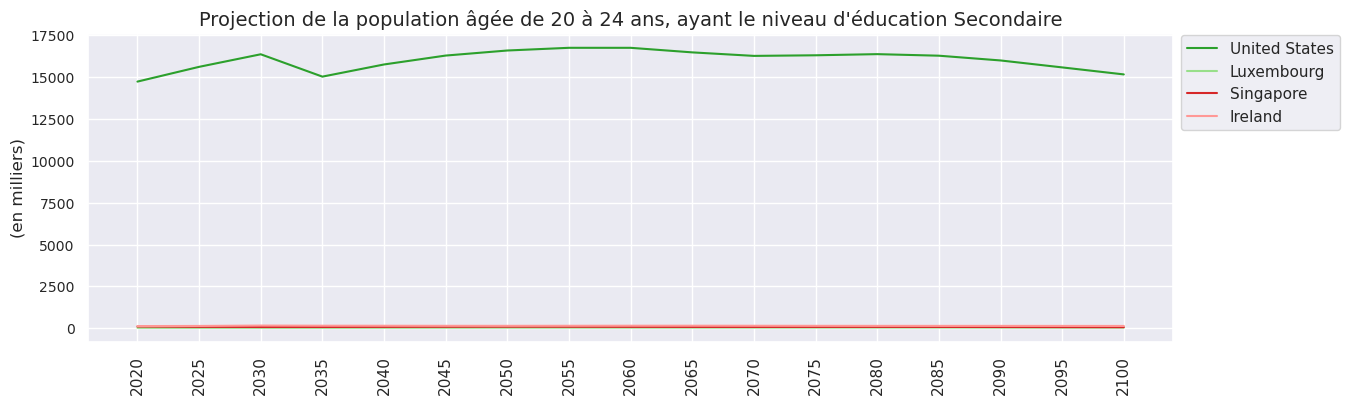

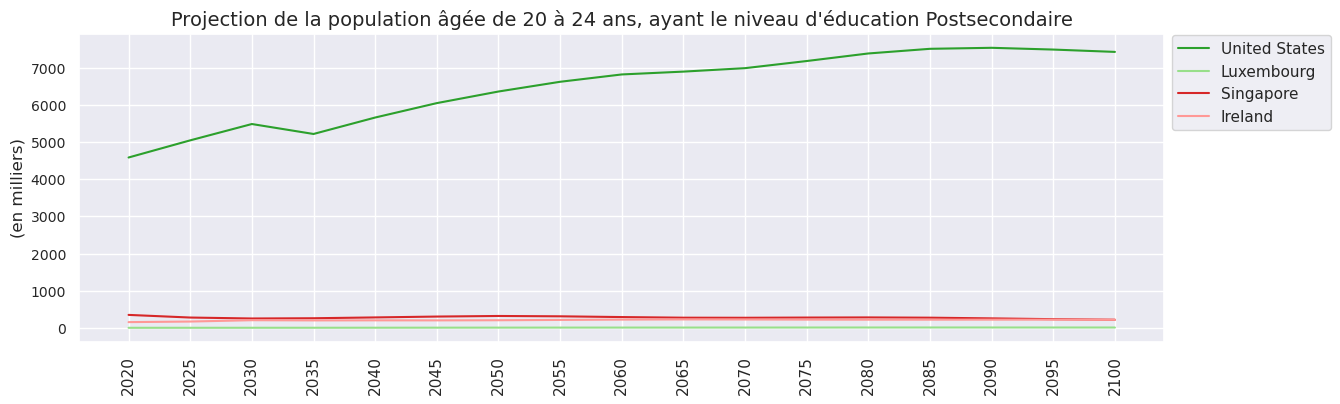

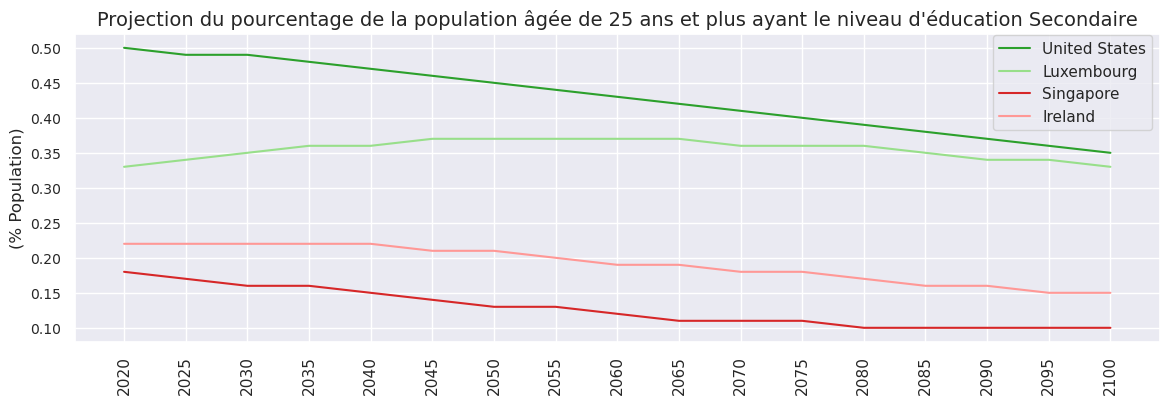

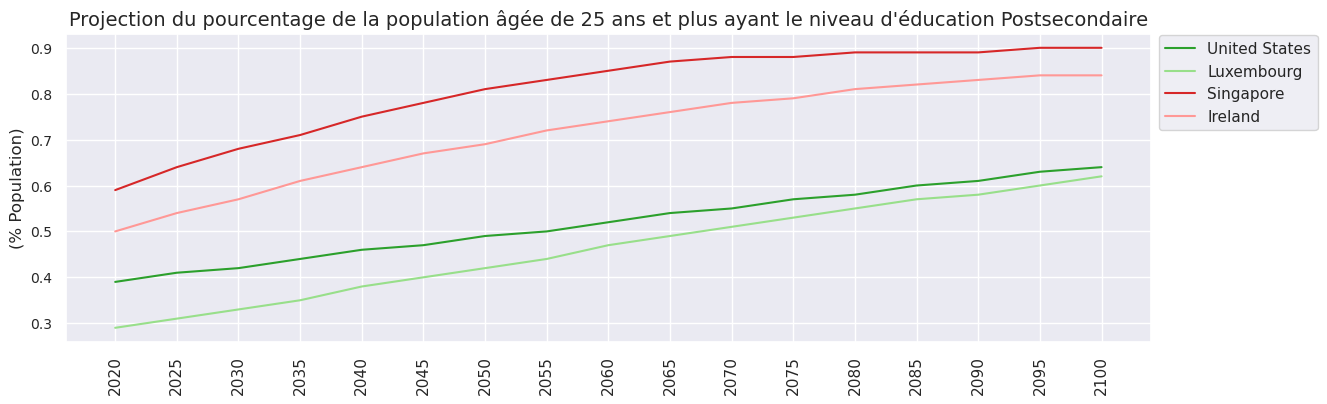

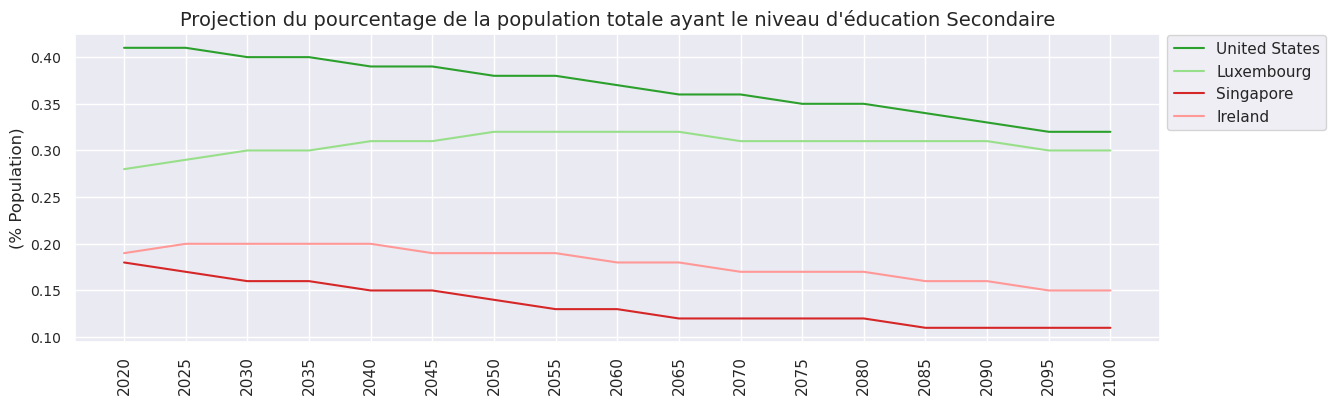

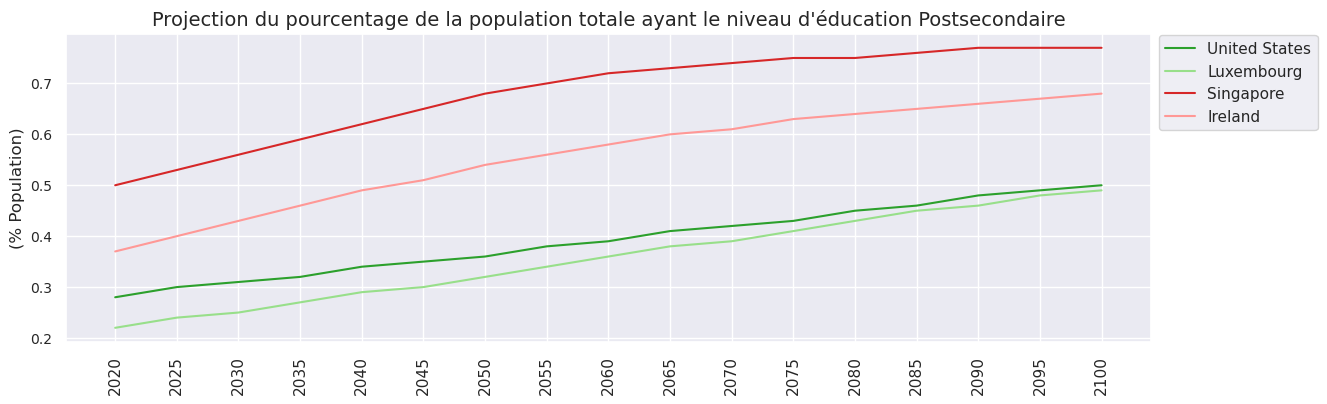

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
dtype: object

In [77]:
PaysAnalyseSelectByMe=['United States','Luxembourg','Singapore','Ireland']
SelectionIndicateursPrev.apply(GraphiqueDetailPaysSelectByMePrev,axis='columns')